'memory', 'height', 'width', 'depth', 'square',  'video_resolution_v', 'video_resolution_h', 'screen_resolution_h', 'screen_resolution_v', 'screen_diag', 'dust_IP', 'water_IP', 'weight, 'is_5G', 'Год релиза', 'Поддержка быстрой зарядки' , 'battery_bin', 'Поддержка беспроводной зарядки', 
'brand', 'Гарантия предоставляется', 'Страна', 'Количество основных камер (шт)', 'Сумма Мпикс основной камеры', 'Материал корпуса'

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import ast
import numpy as np
import seaborn as sns
import warnings
import statsmodels.api as sm

warnings.filterwarnings("ignore")

In [170]:
df = pd.read_csv('mvideo_features.csv')
df = df.drop_duplicates(subset=df.columns.difference(['product_id']), keep='first').reset_index(drop=True)

df.head(3)

columns_needed = ['Серия', 'Поддержка SIM карт', 'Поддержка стандартов', 'Год релиза', 'Количество ядер', 'Технология экрана', 'Разрешение экрана', 'Экран',
                  "Степень защиты", "Разрешение видеосъемки", "Цифровой зум (x)", "Оперативная и встроенная память", 
                  "Вес (г)", "Габаритные размеры (В*Ш*Т)", "Габаритные размеры (В*Ш*Г)", "Мощность блока питания (Вт)", "Встроенная память (ROM) (ГБ)", 
                  'Диагональ дополнительного экрана (")','Разрешение по горизонтали в развернутом виде (Пикс)',
                  "Разрешение по вертикали в развернутом виде (Пикс)",'Диагональ в развернутом виде (")', 'Оптическая стабилизация','Оптический зум на увеличение (x)',
                  "Разрешение дополнительного экрана по вертикали (Пикс)","Разрешение дополнительного экрана по горизонтали (Пикс)", 
                  'Поддержка быстрой зарядки', 'Емкость аккумулятора (мАч)', 'Поддержка беспроводной зарядки', 'brand', 'Встроенный искусственный интеллект',
                  'Гарантия предоставляется', 'Страна', 'Основная камера МПикс','Съемка видео в портретном режиме', 'Фронтальная камера МПикс',
                  'Количество основных камер (шт)', 'Состояние', 'Безрамочный', 'Материал корпуса']
target = ['salePrice']

df1 = df[columns_needed + target + ['product_id', 'name']]
df1[["Габаритные размеры (В*Ш*Т)", "Габаритные размеры (В*Ш*Г)"]].head(3)
def choose(row):
    if '0' in str(row['memory2']):
        return row['memory2']
    if '0' in str(row['memory3']):
        return row['memory3']
    return row['memory4']

def get_memory(x):
    if type(x) == float:
        return x
    if type(x) == str:
        f = re.findall(r'[0-9]+', x)
        if type(f[-1]) == str:
            return float(f[-1])
    return x
def get_memory_from_name(x):
    if 'TB' in x:
        f = re.findall(r'[0-9/]+TB', x)
        return get_memory(f[0]) * 1024.0 if len(f) > 0 else np.nan
    if 'GB' in x:
        f = re.findall(r'[0-9/]+GB', x)
        return get_memory(f[0]) if len(f) > 0 else np.nan
    return np.nan

df1['memory2'] = df1["Оперативная и встроенная память"].apply(lambda x: get_memory(x))
df1['memory3'] = df1["Встроенная память (ROM) (ГБ)"].apply(lambda x: get_memory(x))
df1['memory4'] = df1["name"].apply(lambda x: get_memory_from_name(x))
df1['memory'] = df1.apply(choose, axis=1)

df1 = df1.drop(columns=["Оперативная и встроенная память", "Встроенная память (ROM) (ГБ)", 'memory2', 'memory3', 'memory4'])
def get_height(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if type(f[0]) == str:
            return float(f[0])
    return x

def get_width(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if type(f[1]) == str:
            return float(f[1])
    return x


def get_depth(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if len(f) < 3:
            return np.nan
        if type(f[2]) == str:
            return float(f[2])
    return np.nan

def choose_h(row):
    if row['height1'] !=  np.nan:
        return row['height1']
    return row['height2']
def choose_w(row):
    if row['width1'] !=  np.nan:
        return row['width1']
    return row['width2']
def choose_d(row):
    if row['depth1'] !=  np.nan:
        return row['depth1']
    return row['depth2']


df1['height1'] = df1["Габаритные размеры (В*Ш*Т)"].apply(lambda x: get_height(x))
df1['width1'] = df1["Габаритные размеры (В*Ш*Т)"].apply(lambda x: get_width(x))
df1['depth1'] = df1["Габаритные размеры (В*Ш*Т)"].apply(lambda x: get_depth(x))

df1['height2'] = df1["Габаритные размеры (В*Ш*Г)"].apply(lambda x: get_height(x))
df1['width2'] = df1["Габаритные размеры (В*Ш*Г)"].apply(lambda x: get_width(x))
df1['depth2'] = df1["Габаритные размеры (В*Ш*Г)"].apply(lambda x: get_depth(x))

df1['height'] = df1.apply(choose_h, axis=1)
df1['width'] = df1.apply(choose_w, axis=1)
df1['depth'] = df1.apply(choose_d, axis=1)
df1['square'] = df1['height'] * df1['width']
df1['volume'] = df1['height'] * df1['width'] * df1['depth']

df1 = df1.drop(columns=["Габаритные размеры (В*Ш*Т)", "Габаритные размеры (В*Ш*Г)", 
                        'height1', 'height2', 'width1', 'width2', 'depth1', 'depth2'])

def get_res_0(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if type(f[0]) == str:
            return float(f[0])
    return 720.0

def get_res_1(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if type(f[1]) == str:
            return float(f[1])
    return 720.0



df1['video_resolution_v'] = df1["Разрешение видеосъемки"].apply(lambda x: get_res_1(x))
df1['video_resolution_h'] = df1["Разрешение видеосъемки"].apply(lambda x: get_res_0(x))

df1['screen_resolution_h'] = df1["Разрешение экрана"].apply(lambda x: get_res_0(x))
df1['screen_resolution_v'] = df1["Разрешение экрана"].apply(lambda x: get_res_1(x))

df1['screen_diag'] = df1["Экран"].apply(lambda x: np.nan if get_res_0(x) > 9.0 else get_res_0(x))


df1 = df1.drop(columns=["Разрешение видеосъемки", "Разрешение экрана", "Экран"])

def get_dust_IP(x):
    if type(x) is str and x[:2] == 'IP':
        if x[2] == 'X':
            return np.nan
        return int(x[2])
    return 0.0

def get_water_IP(x):
    if type(x) is str and  x[:2] == 'IP':
        if x[3] == 'X':
            return np.nan
        return int(x[3])
    return 0.0


df1['dust_IP'] = df1["Степень защиты"].apply(lambda x: get_dust_IP(x))
df1['water_IP'] = df1["Степень защиты"].apply(lambda x: get_water_IP(x))

df1 = df1.drop(columns=["Степень защиты"])

df1['zoom'] = df1['Цифровой зум (x)']
df1['weight'] = df1['Вес (г)']
df1['kernel_cnt'] = df1['Количество ядер']
df1['screen_technology'] = df1['Технология экрана']
df1['power'] = df1['Мощность блока питания (Вт)']

metals = ['металл', 'титан', 'алюм', 'сталь']
df1['frame_has_metal'] = df1['Материал корпуса'].apply(lambda x: any(metal in x.lower() for metal in metals) if type(x) == str else False).astype('int')
df1['frame_has_plastic'] = df1['Материал корпуса'].apply(lambda x: 'пластик' in x.lower() if type(x) == str else False ).astype('int')

df1 = df1.drop(columns=["Цифровой зум (x)", "Вес (г)", "Количество ядер", "Технология экрана", "Мощность блока питания (Вт)", "Материал корпуса"])

In [171]:
data = df1

In [172]:
data['Состояние'].unique()

array(['новый', nan, 'восстановленный'], dtype=object)

In [173]:
print(data['Емкость аккумулятора (мАч)'].isna().sum())

236


In [174]:
iphone_battery_capacity = {
    'iPhone 16 Pro': 3355,
    'iPhone 16 Pro Max': 4676,
    'iPhone 16': 3561,
    'iPhone 16 Plus': 4006,
    'iPhone 15 Pro': 3274,
    'iPhone 15 Pro Max': 4422,
    'iPhone 15': 3349,
    'iPhone 15 Plus': 4383,
    'iPhone 14 Pro': 3200,
    'iPhone 14 Pro Max': 4323,
    'iPhone 14': 3279,
    'iPhone 14 Plus': 4325,
    'iPhone 13 Pro': 3095,
    'iPhone 13 Pro Max': 4352,
    'iPhone 13': 3227,
    'iPhone 13 mini': 2406,
    'iPhone SE (2022)': 2018,
    'iPhone SE (2020)': 1821,
    'iPhone 12 Pro': 2815,
    'iPhone 12 Pro Max': 3687,
    'iPhone 12': 2815,
    'iPhone 12 mini': 2227,
    'iPhone 11 Pro': 3046,
    'iPhone 11 Pro Max': 3969,
    'iPhone 11': 3110,
    'iPhone XR': 2942,
    'iPhone XS': 2658,
    'iPhone XS Max': 3174,
    'iPhone X': 2716,
    'iPhone 8 Plus': 2691,
    'iPhone 8': 1821
}

# Нормализуем словарь: убираем "iPhone ", приводим к нижнему регистру
normalized_battery_capacity = {
    model.lower().replace('iphone ', '').strip(): capacity
    for model, capacity in iphone_battery_capacity.items()
}
# print(normalized_battery_capacity)

def fill_iphone_capacity(row):
    if pd.isna(row['Емкость аккумулятора (мАч)']):
        # Приводим серию к тому же формату
        series = str(row['Серия']).lower().replace('iphone', '').replace('apple', '').strip()
        # print(series)
        return normalized_battery_capacity.get(series, row['Емкость аккумулятора (мАч)'])
    return row['Емкость аккумулятора (мАч)']

data['Емкость аккумулятора (мАч)'] = data.apply(fill_iphone_capacity, axis=1)


In [175]:
data[['Емкость аккумулятора (мАч)', 'brand', 'Серия']][data.brand == 'Apple']

,Емкость аккумулятора (мАч),brand,Серия
0,3227.0,Apple,iPhone 13
3,3355.0,Apple,iPhone 16 Pro
10,4676.0,Apple,iPhone 16 Pro Max
11,4676.0,Apple,iPhone 16 Pro Max
12,4676.0,Apple,iPhone 16 Pro Max
...,...,...,...
919,4422.0,Apple,iPhone 15 Pro Max
921,3355.0,Apple,Apple iPhone 16 Pro
924,3274.0,Apple,iPhone 15 Pro
925,3355.0,Apple,iPhone 16 Pro


In [176]:
print(data['Емкость аккумулятора (мАч)'].isna().sum())

4


In [177]:
data.columns

Index(['Серия', 'Поддержка SIM карт', 'Поддержка стандартов', 'Год релиза',
       'Диагональ дополнительного экрана (")',
       'Разрешение по горизонтали в развернутом виде (Пикс)',
       'Разрешение по вертикали в развернутом виде (Пикс)',
       'Диагональ в развернутом виде (")', 'Оптическая стабилизация',
       'Оптический зум на увеличение (x)',
       'Разрешение дополнительного экрана по вертикали (Пикс)',
       'Разрешение дополнительного экрана по горизонтали (Пикс)',
       'Поддержка быстрой зарядки', 'Емкость аккумулятора (мАч)',
       'Поддержка беспроводной зарядки', 'brand',
       'Встроенный искусственный интеллект', 'Гарантия предоставляется',
       'Страна', 'Основная камера МПикс', 'Съемка видео в портретном режиме',
       'Фронтальная камера МПикс', 'Количество основных камер (шт)',
       'Состояние', 'Безрамочный', 'salePrice', 'product_id', 'name', 'memory',
       'height', 'width', 'depth', 'square', 'volume', 'video_resolution_v',
       'video_resol

In [178]:
data['standarts'] = data['Поддержка стандартов'].apply(lambda x: re.split(r'[ /]', str(x)))
data['is_5G'] = data['standarts'].apply(lambda x: '5G' in x if isinstance(x, list) else False)
data['is_5G'] = data['is_5G'].astype(int)
data['year'] = np.where(data['Год релиза'] != 2028, data['Год релиза'], 2023)
data['quick_charge'] = (data['Поддержка быстрой зарядки'] == 'Да').astype(int)
# data.rename(columns={'Поддержка быстрой зарядки' : 'quick_charge'}, inplace=True)
data['wireless_charging'] = (data['Поддержка беспроводной зарядки'] == 'Да').astype(int)
data['ai'] = (data['Встроенный искусственный интеллект'] == 'Да').astype(int)
bin_size = 100
mean_battery = data['Емкость аккумулятора (мАч)'].mean()
data['battery_bin'] = (
	pd.to_numeric(data['Емкость аккумулятора (мАч)'], errors='coerce')
	.fillna(mean_battery)
	.apply(lambda x: int(x) // bin_size * bin_size if not pd.isna(x) else np.nan)
)
data['frameless'] = (data['Безрамочный'] == 'Да').astype(int)
data['used'] = (data['Состояние'] == 'восстановленный').astype(int)
data = data.rename(columns={'Емкость аккумулятора (мАч)' : 'battery', 
                            'Количество основных камер (шт)' : 'main_cams',
                            })

data['dop_screen'] = (data['Диагональ дополнительного экрана (")'].isna()).astype(int)
data['is_fold'] = (data['Диагональ в развернутом виде (")'].isna()).astype(int)

In [179]:
def get_year(x):
    if x >= 2022.0:
        return int(x)
    return 2022

data['year'] = data['year'].apply(lambda x: get_year(x))
# data = data[data['year'] != '2028']
# data = data.drop(columns=['Год релиза'])

In [180]:
# Список столбцов, где нужно заменить NaN на 0
columns_to_fill = [
    'main_cams', 
    'Фронтальная камера МПикс', 
    'Оптический зум на увеличение (x)'
]

data[columns_to_fill] = data[columns_to_fill].fillna(0)
data[['Съемка видео в портретном режиме','Оптическая стабилизация']] = data[['Съемка видео в портретном режиме', 'Оптическая стабилизация']].fillna("Нет")

In [181]:
data['China'] = (data['Страна'] == 'Китай').astype(int)

In [182]:
# Преобразуем в список чисел
def parse_camera(s):
    mp_values = []
    for x in str(s).split('/'):
        if x.strip() == '0':
            continue
        try:
            # Пробуем преобразовать в число
            mp_values.append(float(x))
        except ValueError:
            # Если не число (например, "TOF"), пропускаем или добавляем 0
            continue
    return mp_values

data['camera_mp_parsed'] = data['Основная камера МПикс'].apply(parse_camera)
data['front_camera'] = data['Фронтальная камера МПикс'].apply(parse_camera)

data['total_camera_mp'] = data['camera_mp_parsed'].apply(lambda x: sum(x) if x else 0)
data['total_front_camera'] = data['front_camera'].apply(lambda x: sum(x) if x else 0)

data['guarantee'] = data['Гарантия предоставляется'] = (data['Гарантия предоставляется'] == 'продавцом').astype(int)
data['stabilization'] = (data['Оптическая стабилизация'] == 'Да').astype(int)
data['portrait'] = (data['Съемка видео в портретном режиме'] == 'Да').astype(int)
data['opt_zoom'] = data['Оптический зум на увеличение (x)']
data = data.drop(columns=['Основная камера МПикс', 'Фронтальная камера МПикс', 'camera_mp_parsed', 'front_camera', 'Страна',
                           'Оптический зум на увеличение (x)', 'Гарантия предоставляется','Оптическая стабилизация', 'Съемка видео в портретном режиме'])

In [183]:
data.columns

Index(['Серия', 'Поддержка SIM карт', 'Поддержка стандартов', 'Год релиза',
       'Диагональ дополнительного экрана (")',
       'Разрешение по горизонтали в развернутом виде (Пикс)',
       'Разрешение по вертикали в развернутом виде (Пикс)',
       'Диагональ в развернутом виде (")',
       'Разрешение дополнительного экрана по вертикали (Пикс)',
       'Разрешение дополнительного экрана по горизонтали (Пикс)',
       'Поддержка быстрой зарядки', 'battery',
       'Поддержка беспроводной зарядки', 'brand',
       'Встроенный искусственный интеллект', 'main_cams', 'Состояние',
       'Безрамочный', 'salePrice', 'product_id', 'name', 'memory', 'height',
       'width', 'depth', 'square', 'volume', 'video_resolution_v',
       'video_resolution_h', 'screen_resolution_h', 'screen_resolution_v',
       'screen_diag', 'dust_IP', 'water_IP', 'zoom', 'weight', 'kernel_cnt',
       'screen_technology', 'power', 'frame_has_metal', 'frame_has_plastic',
       'standarts', 'is_5G', 'year', 'qui

Модель 1

In [184]:
features = ['memory', 'height', 'width', 'depth', 'square', 'China', 'total_camera_mp', 'total_front_camera', 'guarantee',
            'video_resolution_v', 'video_resolution_h', 'screen_resolution_h',
            'frame_has_metal', 'frame_has_plastic', 'main_cams',
            'screen_resolution_v', 'screen_diag', 'dust_IP', 'water_IP', 'weight']

target = 'salePrice'
X = data[features]
y = data[target]
X_filled = X.fillna(X.mean())
X_filled = sm.add_constant(X_filled)
model_sm = sm.OLS(y, X_filled).fit()

print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              salePrice   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     119.5
Date:                Wed, 07 May 2025   Prob (F-statistic):          7.14e-238
Time:                        21:30:17   Log-Likelihood:                -10797.
No. Observations:                 929   AIC:                         2.164e+04
Df Residuals:                     908   BIC:                         2.174e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.737e+04   3

'is_5G', 'Год релиза', 'Поддержка быстрой зарядки' , 'battery_bin', 'Поддержка беспроводной зарядки', 
'brand', 'Гарантия предоставляется', 'Страна', 'Количество основных камер (шт)', 'Сумма Мпикс основной камеры', 'Материал корпуса'

Модель 2

In [185]:
data.columns

Index(['Серия', 'Поддержка SIM карт', 'Поддержка стандартов', 'Год релиза',
       'Диагональ дополнительного экрана (")',
       'Разрешение по горизонтали в развернутом виде (Пикс)',
       'Разрешение по вертикали в развернутом виде (Пикс)',
       'Диагональ в развернутом виде (")',
       'Разрешение дополнительного экрана по вертикали (Пикс)',
       'Разрешение дополнительного экрана по горизонтали (Пикс)',
       'Поддержка быстрой зарядки', 'battery',
       'Поддержка беспроводной зарядки', 'brand',
       'Встроенный искусственный интеллект', 'main_cams', 'Состояние',
       'Безрамочный', 'salePrice', 'product_id', 'name', 'memory', 'height',
       'width', 'depth', 'square', 'volume', 'video_resolution_v',
       'video_resolution_h', 'screen_resolution_h', 'screen_resolution_v',
       'screen_diag', 'dust_IP', 'water_IP', 'zoom', 'weight', 'kernel_cnt',
       'screen_technology', 'power', 'frame_has_metal', 'frame_has_plastic',
       'standarts', 'is_5G', 'year', 'qui

In [186]:
features = ['memory', 'height', 'width', 'depth', 'square',  
            'video_resolution_v', 'video_resolution_h', 'screen_resolution_h', 
            'frame_has_metal', 'frame_has_plastic', 'China', 'total_camera_mp', 'total_front_camera', 'guarantee', 'stabilization', 'portrait', 'opt_zoom',
            'screen_resolution_v', 'screen_diag', 'dust_IP', 'water_IP', 'weight', 
            'is_5G', 'year', 'quick_charge', 'battery_bin', 'wireless_charging']

target = 'salePrice'
X = data[features]
y = data[target]
X_filled = X.fillna(X.mean())
X_filled = sm.add_constant(X_filled)
model_sm = sm.OLS(y, X_filled).fit()

print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              salePrice   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     188.6
Date:                Wed, 07 May 2025   Prob (F-statistic):               0.00
Time:                        21:30:17   Log-Likelihood:                -10516.
No. Observations:                 929   AIC:                         2.109e+04
Df Residuals:                     901   BIC:                         2.122e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.054e+07   1

Дамми на бренды

In [187]:
brand_counts = data['brand'].value_counts()
print(brand_counts)

brand
Apple       236
Samsung     181
Xiaomi      121
Tecno        73
realme       65
HONOR        56
HUAWEI       47
Infinix      38
vivo         37
POCO         35
OPPO         34
Motorola      2
Nubia         1
Redmi         1
Nothing       1
OnePlus       1
Name: count, dtype: int64


In [188]:
data['brand_Apple'] = (data['brand'] == 'Apple').astype(int)
data['brand_Samsung'] = (data['brand'] == 'Samsung').astype(int)
data['brand_Xiaomi'] = (data['brand'] == 'Xiaomi').astype(int)
data['brand_Tecno'] = (data['brand'] == 'Tecno').astype(int)
data['brand_HONOR'] = (data['brand'] == 'HONOR').astype(int)
data['brand_HUAWEI'] = (data['brand'] == 'HUAWEI').astype(int)
data['brand_Infinix'] = (data['brand'] == 'Infinix').astype(int)
data['brand_POCO'] = (data['brand'] == 'POCO').astype(int)
data['brand_OPPO'] = (data['brand'] == 'OPPO').astype(int)
data['brand_Motorola'] = (data['brand'] == 'Motorola').astype(int)

In [189]:
features = ['memory', 'height', 'width', 'depth', 'square',  
            'video_resolution_v', 'video_resolution_h', 'screen_resolution_h', 
            'screen_resolution_v', 'screen_diag', 'dust_IP', 'water_IP', 'weight', 
            'frame_has_metal', 'frame_has_plastic', 'China', 'total_camera_mp', 'total_front_camera', 'guarantee', 'stabilization', 'portrait',  'opt_zoom', 'main_cams',
            'is_5G', 'year', 'quick_charge', 'battery_bin', 'wireless_charging', 'zoom',
            'brand_Apple', 'brand_Samsung']

target = 'salePrice'
X = data[features]
y = data[target]
X_filled = X.fillna(X.mean())
X_filled = sm.add_constant(X_filled)
model_sm = sm.OLS(y, X_filled).fit()

print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              salePrice   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     181.8
Date:                Wed, 07 May 2025   Prob (F-statistic):               0.00
Time:                        21:30:17   Log-Likelihood:                -10473.
No. Observations:                 929   AIC:                         2.101e+04
Df Residuals:                     897   BIC:                         2.117e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -2.19e+07   1

Всё-таки попробуем использовать PCA

In [190]:
import pandas as pd # работа с таблицами
from sklearn.decomposition import PCA # функция PCA, вычисляющая главные компоненты
from sklearn.preprocessing import StandardScaler # стандартизация признаков

# Select specific columns
columns_to_use = ['height', 'width', 'square', 'depth']
data_subset = X_filled[columns_to_use]

# Standardize the data (important for PCA)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_subset)
pca_model = PCA(n_components=1)
principalComponents = pca_model.fit_transform(scaled_data)
principaldata = pd.DataFrame(data = principalComponents, columns = ['size'])
principaldata

,size
0,2.453266e-17
1,4.375339e-01
2,3.797306e-01
3,2.453266e-17
4,3.317091e-01
...,...
924,2.453266e-17
925,2.453266e-17
926,3.139074e-01
927,3.164535e-01


In [191]:
features = ['memory', 'height', 'width', 'depth', 'square',  
            'video_resolution_v', 'video_resolution_h', 'screen_resolution_h', 
            'screen_resolution_v', 'screen_diag', 'dust_IP', 'water_IP', 'weight', 
            'frame_has_metal', 'frame_has_plastic', 'China', 'total_camera_mp', 'total_front_camera', 'guarantee', 'stabilization', 'portrait',
            'is_5G', 'year', 'quick_charge', 'wireless_charging', 'battery', 'opt_zoom',
            'brand_Apple', 'brand_Samsung', 'brand_Infinix', 'zoom', 'main_cams', 'used', 'frameless', 'dop_screen', 'is_fold']

target = 'salePrice'
X = data[features]
y = np.log(data[target])
X_filled = X.fillna(X.mean())
X_filled['size'] = principaldata['size']
X_filled = sm.add_constant(X_filled)
model_sm = sm.OLS(y, X_filled).fit()

print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              salePrice   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     403.6
Date:                Wed, 07 May 2025   Prob (F-statistic):               0.00
Time:                        21:30:17   Log-Likelihood:                 133.60
No. Observations:                 929   AIC:                            -193.2
Df Residuals:                     892   BIC:                            -14.33
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.8325    

Выбросы

Рассмотрим объекты, которые будут считаться выбросами по трем методам

1. Стьюдентизированные остатки 

$$ e_i^{'} = \frac{e_i}{s(i)\sqrt{1 - h_i}} \sim t_{n - k} $$

где: 

$e_i$ - остаток по конктретному наблюдению, полученный по уравнению регрессии с учетом $i$-го наблюдения.

$s(i)$ - стандартное отклонение остатков, полученное по уравнению регрессии, построенному по тому же набору наблюдений, но без $i$-го. 

$h_i$ - диагональный элемент матрицы $X(X'X)^{-1}X'$

В качестве интервала будем использовать 95% доверительный интервал для $t_{n - k} = t_{124}$

Критические значения в таком случае: $t_1 = -1.98, t_2 = 1.98$

2. Точки Левериджа
   
Пусть $h_i$ - $i$-ый диагональный элемент матрицы проектора $X(X'X)^{-1}X'$. Тогда точки Левериджа: 

$$ h_i > \frac{2k}{n} $$ 

 где $k$ - число регрессоров, $n$ - число наблюдений.

Такие точки можно считать выбросами

3. DFFITS

$$ DFFITS_i = e_i^{'}\cdot \sqrt{\frac{h_i}{1 - h_i}} $$

Если $DFFITS_i > 2 \cdot \sqrt{\frac{k}{n}} \Rightarrow i$-ое наблюдение может быть выбросом.

Стьюдентизированные остатки:

In [192]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filled)


Критические значения: t1 = -1.96, t2 = 1.96


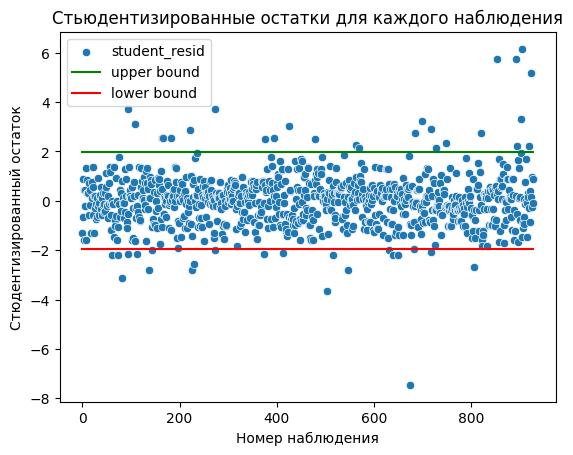

Удалено 10 выбросов. Размер X_filled_clean: (919, 38)


In [193]:
from scipy.stats import t
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_wo_const = X_filled.drop(columns=["const"], errors="ignore")  # если добавляла константу
X_scaled = scaler.fit_transform(X_wo_const)
X_scaled = pd.DataFrame(X_scaled, index=X_filled.index, columns=X_wo_const.columns)

# Теперь добавь константу
X_scaled["const"] = 1
n, k = X_scaled.shape

# Стьюдентизированные остатки
alpha = 0.05
dfree = n - k  # n и k уже определены выше
t_crit = t.ppf(1 - alpha/2, dfree)
print(f"Критические значения: t1 = {-t_crit:.2f}, t2 = {t_crit:.2f}")
st_errors = model_sm.outlier_test()
fig, ax = plt.subplots()
n, k = X_scaled.shape
sns.scatterplot(data=st_errors, x=st_errors.index, y = "student_resid", ax=ax, label="student_resid")
sns.lineplot(x=st_errors.index, y=[1.96]*n, ax=ax, label="upper bound", color="green")
sns.lineplot(x=st_errors.index, y=[-1.96]*n, ax=ax, label="lower bound", color="red")
plt.title("Стьюдентизированные остатки для каждого наблюдения")
plt.xlabel("Номер наблюдения")
plt.ylabel("Стюдентизированный остаток")
plt.show()
outliers_test_1 = st_errors[(st_errors["student_resid"] >= 1.96) | (st_errors["student_resid"] <= -1.96)][["student_resid"]]
outliers_test_1["index"] = outliers_test_1.index
outliers_test_1 = outliers_test_1[["student_resid", "index"]]
# outliers_test_1
# Левериндж
X = X_scaled.to_numpy()
XTX_inv = np.linalg.inv(X.T @ X) # обратная матрица X'X
leverage = np.diag(X @ XTX_inv @ X.T) # диагональные элементы - точки левериджа

# Создадим DataFrame linreg_data с нужными столбцами
linreg_data = X_scaled.copy()
linreg_data["leverage"] = leverage
linreg_data["index"] = linreg_data.index
linreg_data = linreg_data.merge(st_errors[["student_resid"]], left_index=True, right_index=True)
linreg_data["index"] = linreg_data.index  # убедимся, что индекс есть

# Порог для левериджа
const = 2 * k / n

# Найдем выбросы по левериджу
outliers_test_2 = linreg_data[linreg_data["leverage"] > const][["index", "leverage"]]
outliers_test_2
linreg_data["DFFITS"] = linreg_data["student_resid"] * np.sqrt(linreg_data["leverage"] / (1 - linreg_data["leverage"]))

const = 2 * np.sqrt(k / n)

outliers_test_3 = linreg_data[linreg_data["DFFITS"].abs() > const][["index", "DFFITS"]]
# Получаем индексы выбросов по каждому тесту
outlier_idx_1 = set(outliers_test_1['index'])
outlier_idx_2 = set(outliers_test_2['index'])
outlier_idx_3 = set(outliers_test_3['index'])

# Находим пересечение индексов (выбросы по всем трем тестам)
outlier_idx_all = outlier_idx_1 & outlier_idx_2 & outlier_idx_3

# Удаляем эти строки из X_filled
X_filled_clean = X_filled.drop(index=outlier_idx_all)
y_clean = y.drop(index=outlier_idx_all)

print(f"Удалено {len(outlier_idx_all)} выбросов. Размер X_filled_clean: {X_filled_clean.shape}")

In [194]:
X_filled_clean.columns

Index(['const', 'memory', 'height', 'width', 'depth', 'square',
       'video_resolution_v', 'video_resolution_h', 'screen_resolution_h',
       'screen_resolution_v', 'screen_diag', 'dust_IP', 'water_IP', 'weight',
       'frame_has_metal', 'frame_has_plastic', 'China', 'total_camera_mp',
       'total_front_camera', 'guarantee', 'stabilization', 'portrait', 'is_5G',
       'year', 'quick_charge', 'wireless_charging', 'battery', 'opt_zoom',
       'brand_Apple', 'brand_Samsung', 'brand_Infinix', 'zoom', 'main_cams',
       'used', 'frameless', 'dop_screen', 'is_fold', 'size'],
      dtype='object')

In [195]:
model_sm = sm.OLS(y_clean, X_filled_clean).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              salePrice   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     504.3
Date:                Wed, 07 May 2025   Prob (F-statistic):               0.00
Time:                        21:30:23   Log-Likelihood:                 238.92
No. Observations:                 919   AIC:                            -403.8
Df Residuals:                     882   BIC:                            -225.4
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.2492    

Проверка предпосылок теоремы Гаусса-Маркова:

Несмещенность ошибок

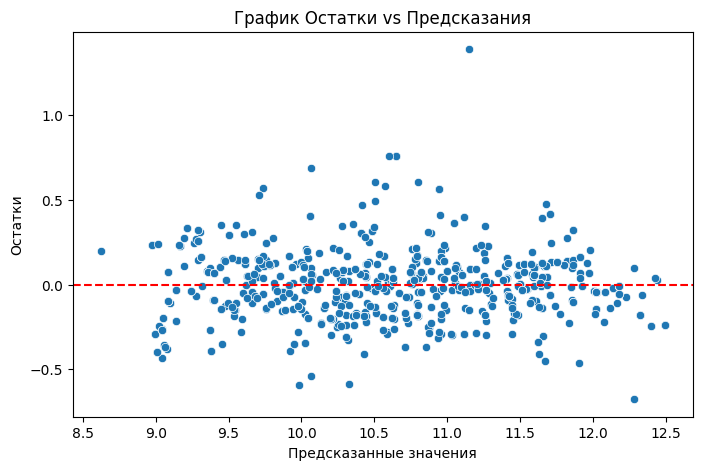

In [196]:
# Получаем предсказания и остатки для модели model_sm
y_pred = model_sm.fittedvalues
residuals = model_sm.resid

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График Остатки vs Предсказания')
plt.show()

Мультиколлинеарность

In [197]:
X_filled_clean.columns

Index(['const', 'memory', 'height', 'width', 'depth', 'square',
       'video_resolution_v', 'video_resolution_h', 'screen_resolution_h',
       'screen_resolution_v', 'screen_diag', 'dust_IP', 'water_IP', 'weight',
       'frame_has_metal', 'frame_has_plastic', 'China', 'total_camera_mp',
       'total_front_camera', 'guarantee', 'stabilization', 'portrait', 'is_5G',
       'year', 'quick_charge', 'wireless_charging', 'battery', 'opt_zoom',
       'brand_Apple', 'brand_Samsung', 'brand_Infinix', 'zoom', 'main_cams',
       'used', 'frameless', 'dop_screen', 'is_fold', 'size'],
      dtype='object')

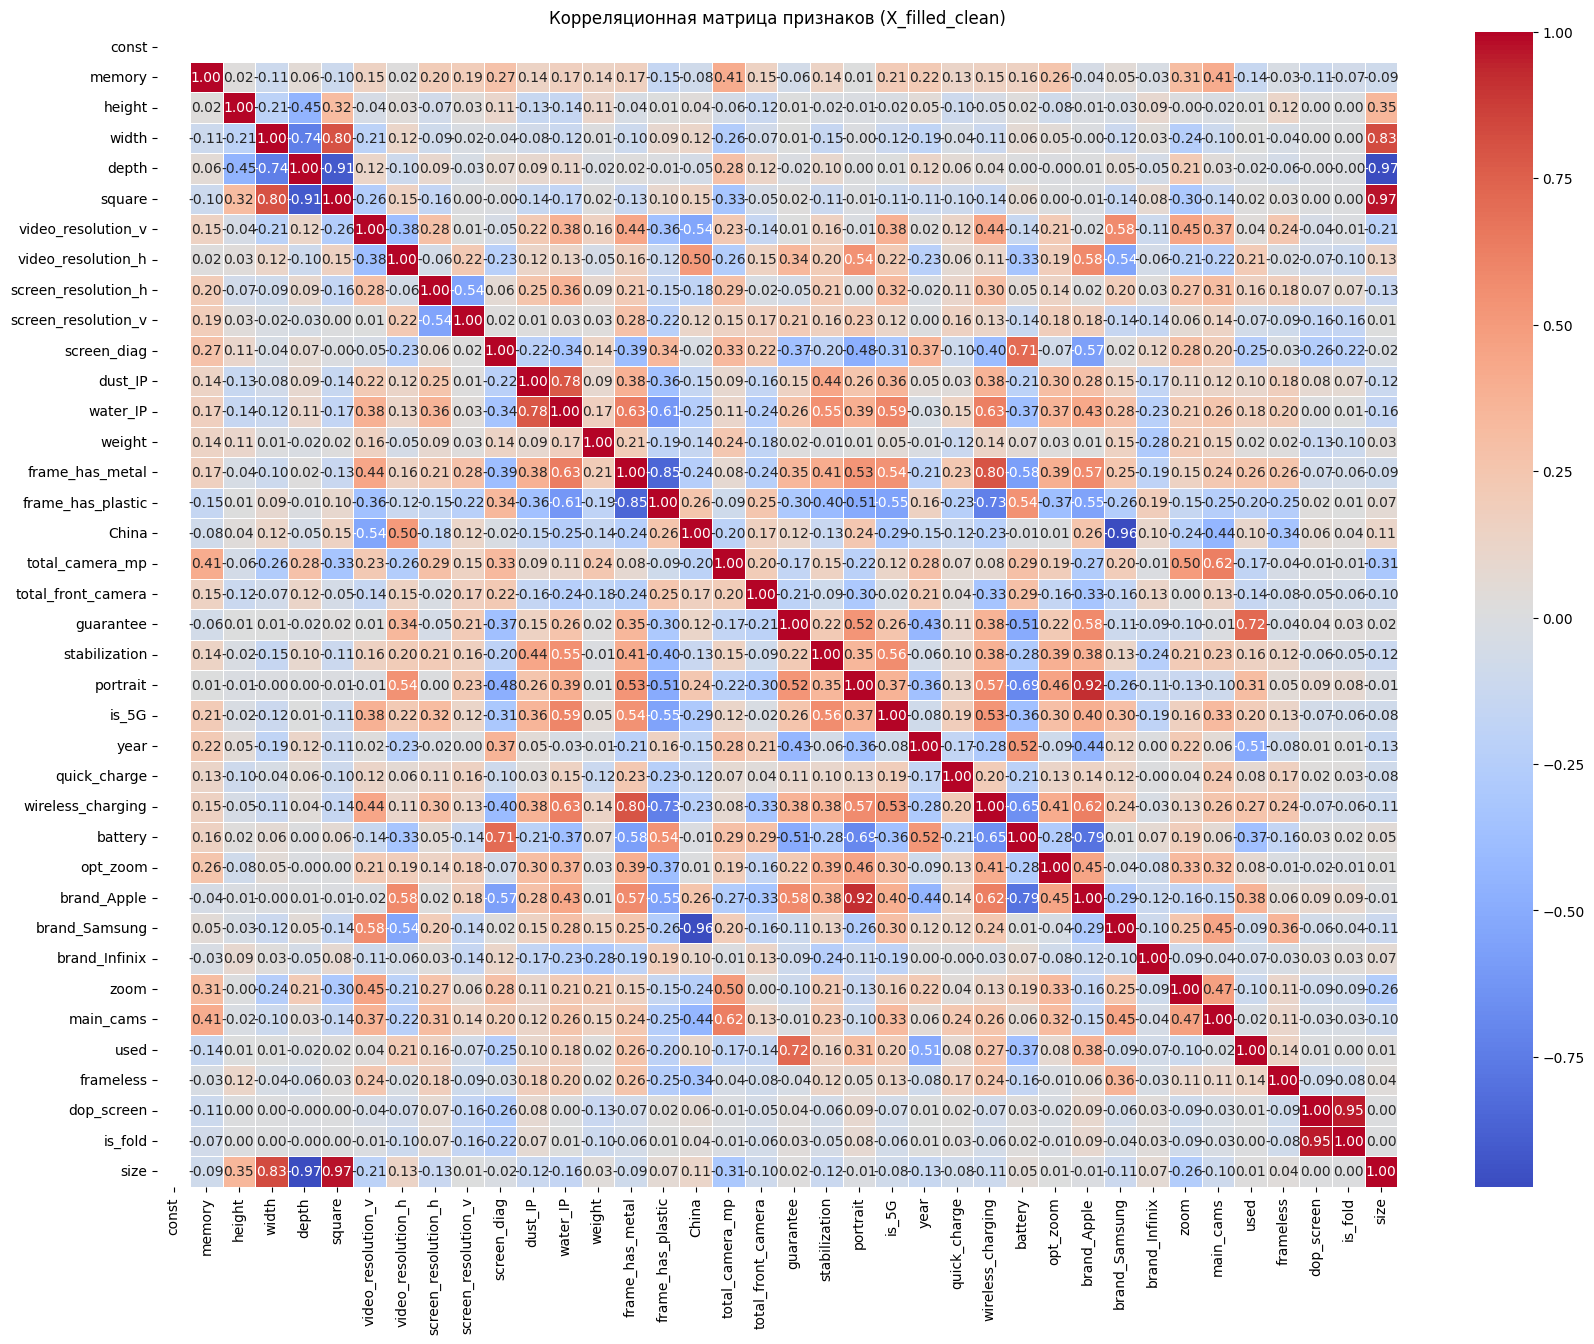

In [198]:
corr_matrix = X_filled_clean.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Корреляционная матрица признаков (X_filled_clean)")
plt.show()

VIF

In [199]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Исключаем константу перед расчётом VIF
X_vif = X_filled_clean.drop(columns=['const'])

# Обновим масштабирование (если нужно), но если ты недавно это делал, можно пропустить
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_vif)
X_scaled = pd.DataFrame(X_scaled, columns=X_vif.columns)

# Добавим константу, как требует statsmodels
X_scaled = sm.add_constant(X_scaled)

# Рассчитаем VIF для всех признаков, включая const
vif_data = pd.DataFrame({
    'feature': X_scaled.columns,
    'VIF': [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
})

# Отсортируем по убыванию VIF
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)

print(vif_data)


                feature        VIF
0                  size        inf
1                height        inf
2                 width        inf
3                 depth        inf
4                square        inf
5         brand_Samsung  22.583909
6           brand_Apple  19.053052
7                 China  17.730440
8            dop_screen  13.513607
9               is_fold  12.381973
10             portrait   7.002146
11              battery   6.900450
12             water_IP   6.568202
13      frame_has_metal   6.310664
14    wireless_charging   5.338899
15    frame_has_plastic   4.571345
16          screen_diag   4.033323
17  screen_resolution_h   3.816519
18  screen_resolution_v   3.814942
19            guarantee   3.772987
20              dust_IP   3.482510
21                 used   3.282012
22            main_cams   3.277793
23   video_resolution_h   3.269422
24      total_camera_mp   3.003899
25                is_5G   2.923887
26   video_resolution_v   2.695571
27             opt_z

In [200]:
X_filled_clean2 = X_filled_clean.drop(columns=['depth', 'square', 'is_fold'])
# X_filled_clean2['P/2'] = X_filled_clean2['height'] + X_filled_clean2['width'] 
X_filled_clean2 = X_filled_clean2.drop(columns=['height', 'width'])
model_sm = sm.OLS(y_clean, X_filled_clean2).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              salePrice   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     481.1
Date:                Wed, 07 May 2025   Prob (F-statistic):               0.00
Time:                        21:30:26   Log-Likelihood:                 164.92
No. Observations:                 919   AIC:                            -263.8
Df Residuals:                     886   BIC:                            -104.7
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -171.8779    

In [201]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Исключаем константу перед расчётом VIF
X_vif = X_filled_clean2.drop(columns=['const'])

# Обновим масштабирование (если нужно), но если ты недавно это делал, можно пропустить
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_vif)
X_scaled = pd.DataFrame(X_scaled, columns=X_vif.columns)

# Добавим константу, как требует statsmodels
X_scaled = sm.add_constant(X_scaled)

# Рассчитаем VIF для всех признаков, включая const
vif_data = pd.DataFrame({
    'feature': X_scaled.columns,
    'VIF': [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
})

# Отсортируем по убыванию VIF
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)

print(vif_data)

                feature        VIF
0         brand_Samsung  22.308443
1           brand_Apple  18.085789
2                 China  17.542128
3              portrait   6.987910
4               battery   6.607213
5       frame_has_metal   6.231576
6              water_IP   6.100852
7     wireless_charging   5.147231
8     frame_has_plastic   4.561613
9             guarantee   3.696671
10  screen_resolution_v   3.657688
11  screen_resolution_h   3.646374
12          screen_diag   3.365401
13              dust_IP   3.283204
14                 used   3.258478
15   video_resolution_h   3.215802
16            main_cams   3.109730
17                is_5G   2.875622
18      total_camera_mp   2.821761
19   video_resolution_v   2.640615
20             opt_zoom   2.159201
21                 zoom   2.103679
22                 year   2.098161
23        stabilization   2.021355
24   total_front_camera   1.917854
25            frameless   1.595724
26           dop_screen   1.589107
27               mem

In [202]:
X_filled_clean2 = X_filled_clean2.drop(columns=['China','portrait','used', 'opt_zoom']) #'opt_zoom','China','portrait','used'

model_sm = sm.OLS(y_clean, X_filled_clean2).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              salePrice   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     507.7
Date:                Wed, 07 May 2025   Prob (F-statistic):               0.00
Time:                        21:30:26   Log-Likelihood:                 128.46
No. Observations:                 919   AIC:                            -198.9
Df Residuals:                     890   BIC:                            -59.05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -241.8253    

In [203]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Исключаем константу перед расчётом VIF
X_vif = X_filled_clean2.drop(columns=['const'])

# Обновим масштабирование (если нужно), но если ты недавно это делал, можно пропустить
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_vif)
X_scaled = pd.DataFrame(X_scaled, columns=X_vif.columns)

# Добавим константу, как требует statsmodels
X_scaled = sm.add_constant(X_scaled)

# Рассчитаем VIF для всех признаков, включая const
vif_data = pd.DataFrame({
    'feature': X_scaled.columns,
    'VIF': [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
})

# Отсортируем по убыванию VIF
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)

print(vif_data)

                feature       VIF
0           brand_Apple  8.861715
1               battery  6.509023
2       frame_has_metal  6.123600
3              water_IP  5.622158
4     wireless_charging  5.141230
5     frame_has_plastic  4.548042
6   screen_resolution_h  3.595481
7         brand_Samsung  3.475772
8   screen_resolution_v  3.400959
9           screen_diag  3.298542
10   video_resolution_h  3.189085
11              dust_IP  3.065956
12            main_cams  2.905110
13                is_5G  2.805870
14      total_camera_mp  2.798040
15   video_resolution_v  2.591967
16        stabilization  1.986977
17                 zoom  1.938961
18   total_front_camera  1.890489
19                 year  1.787049
20            guarantee  1.725203
21           dop_screen  1.562876
22               memory  1.528709
23               weight  1.498468
24            frameless  1.433416
25                 size  1.387449
26        brand_Infinix  1.342519
27         quick_charge  1.282431
28            

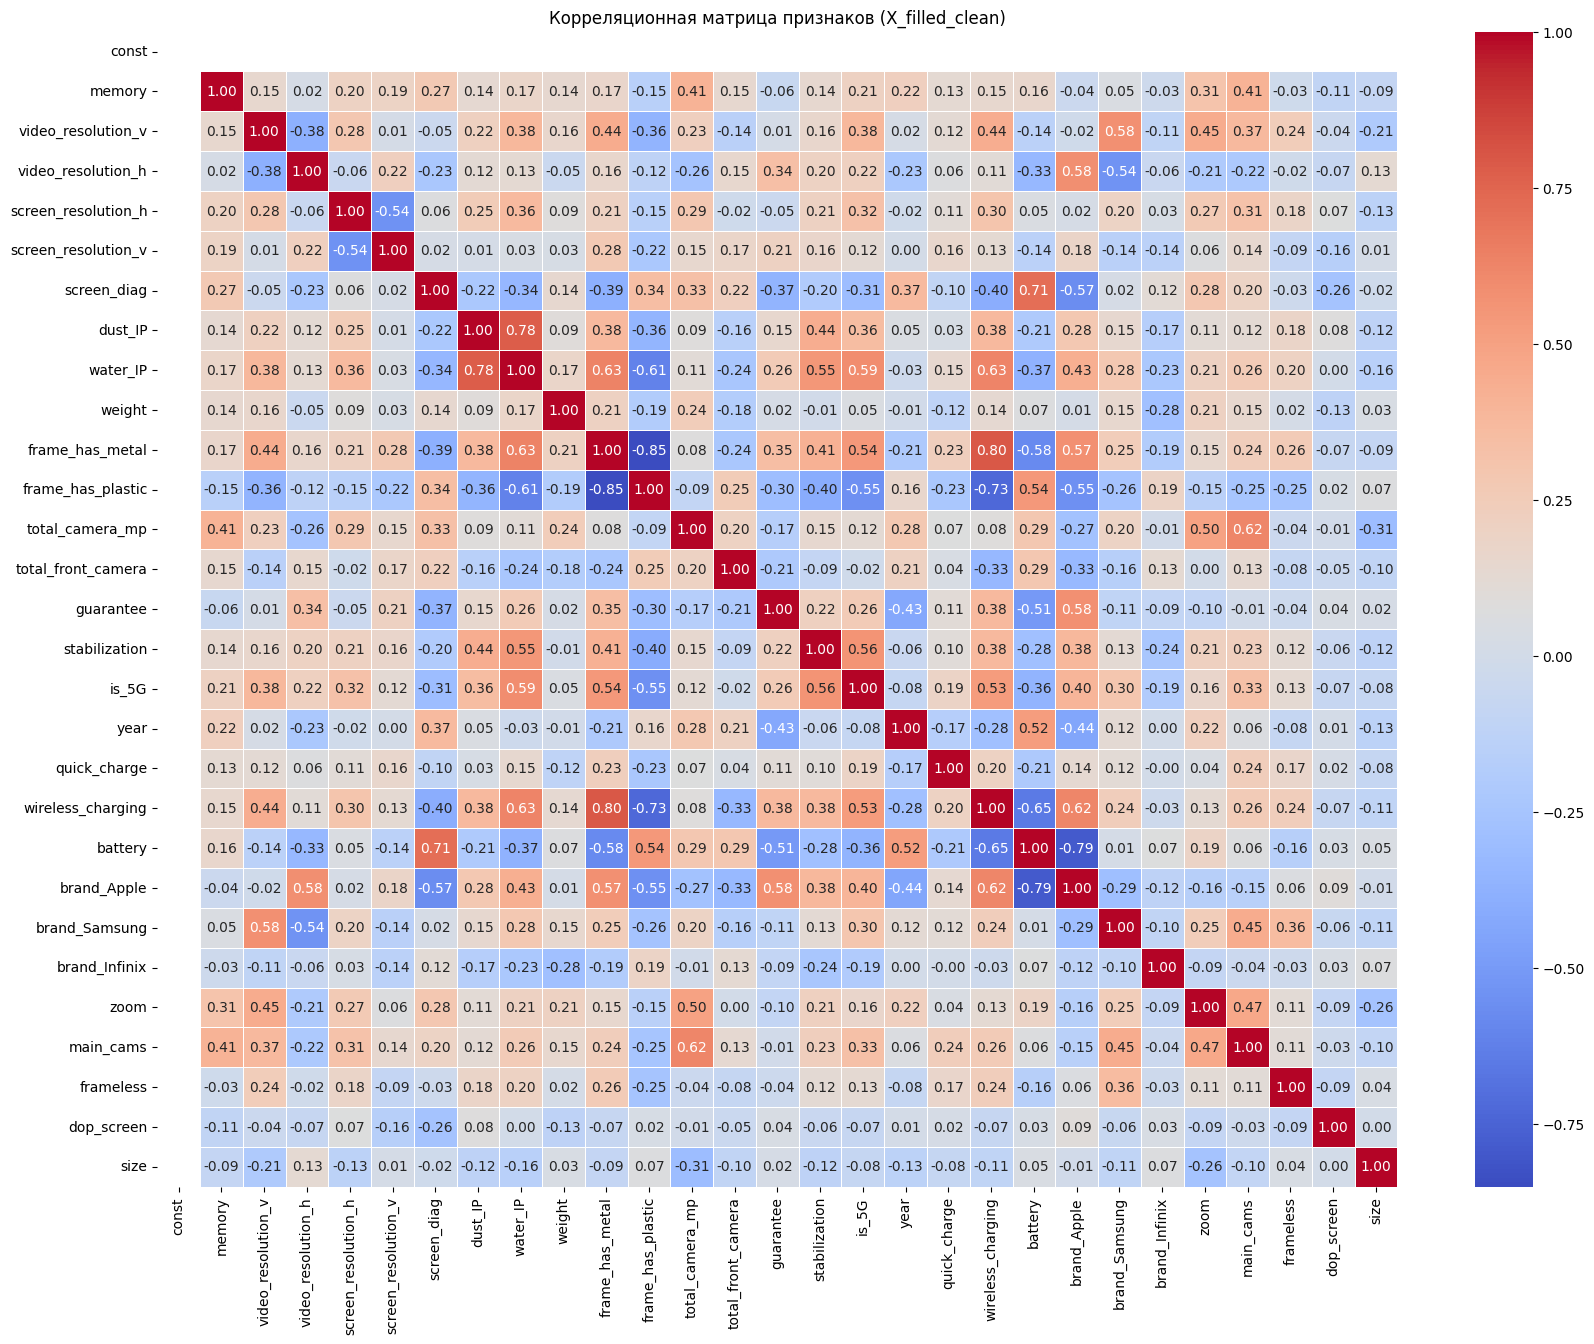

In [204]:
corr_matrix = X_filled_clean2.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Корреляционная матрица признаков (X_filled_clean)")
plt.show()

Гетероскедантичность

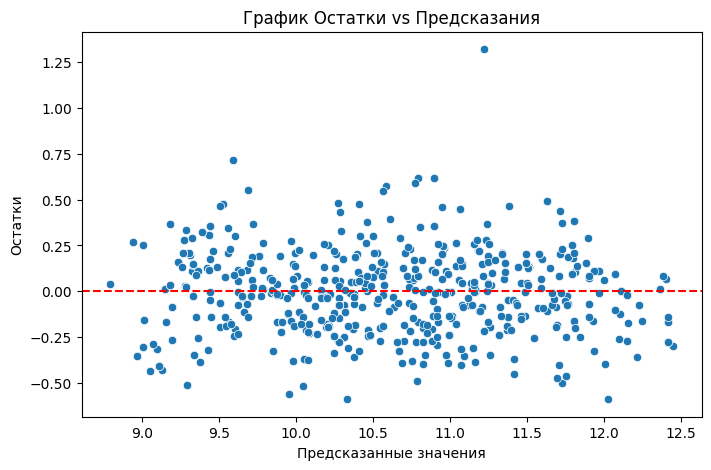

In [205]:
# Получаем предсказания и остатки для модели model_sm
y_pred = model_sm.fittedvalues
residuals = model_sm.resid

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График Остатки vs Предсказания')
plt.show()

In [206]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.Series([variance_inflation_factor(X_filled_clean2.values, i) for i in range(X_filled_clean2.shape[1])],
               index=X_filled_clean2.columns)
print(vif)

const                  8.682894e+06
memory                 1.528709e+00
video_resolution_v     2.591967e+00
video_resolution_h     3.189085e+00
screen_resolution_h    3.595481e+00
screen_resolution_v    3.400959e+00
screen_diag            3.298542e+00
dust_IP                3.065956e+00
water_IP               5.622158e+00
weight                 1.498468e+00
frame_has_metal        6.123600e+00
frame_has_plastic      4.548042e+00
total_camera_mp        2.798040e+00
total_front_camera     1.890489e+00
guarantee              1.725203e+00
stabilization          1.986977e+00
is_5G                  2.805870e+00
year                   1.787049e+00
quick_charge           1.282431e+00
wireless_charging      5.141230e+00
battery                6.509023e+00
brand_Apple            8.861715e+00
brand_Samsung          3.475772e+00
brand_Infinix          1.342519e+00
zoom                   1.938961e+00
main_cams              2.905110e+00
frameless              1.433416e+00
dop_screen             1.562

In [207]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.tools.validation import array_like


def het_white(resid, exog):
    """
    White's Lagrange Multiplier Test for Heteroscedasticity.

    Parameters
    ----------
    resid : array_like
        The residuals. The squared residuals are used as the endogenous
        variable.
    exog : array_like
        The explanatory variables for the variance. Squares and interaction
        terms are automatically included in the auxiliary regression.

    Returns
    -------
    lm : float
        The lagrange multiplier statistic.
    lm_pvalue :float
        The p-value of lagrange multiplier test.
    fvalue : float
        The f-statistic of the hypothesis that the error variance does not
        depend on x. This is an alternative test variant not the original
        LM test.
    f_pvalue : float
        The p-value for the f-statistic.

    Notes
    -----
    Assumes x contains constant (for counting dof).

    question: does f-statistic make sense? constant ?

    References
    ----------
    Greene section 11.4.1 5th edition p. 222. Test statistic reproduces
    Greene 5th, example 11.3.
    """
    x = array_like(exog, "exog", ndim=2)
    y = array_like(resid, "resid", ndim=2, shape=(x.shape[0], 1))
    # _check_het_test(x, "White's heteroskedasticity")
    nobs, nvars0 = x.shape
    i0, i1 = np.triu_indices(nvars0)
    exog = x[:, i0] * x[:, i1]
    nobs, nvars = exog.shape
    assert nvars == nvars0 * (nvars0 - 1) / 2. + nvars0
    resols = sm.OLS(y ** 2, exog).fit()
    fval = resols.fvalue
    fpval = resols.f_pvalue
    lm = nobs * resols.rsquared
    # Note: degrees of freedom for LM test is nvars minus constant
    # degrees of freedom take possible reduced rank in exog into account
    # df_model checks the rank to determine df
    # extra calculation that can be removed:
    # assert resols.df_model == np.linalg.matrix_rank(exog) - 1
    lmpval = stats.chi2.sf(lm, resols.df_model)
    return lm, lmpval, fval, fpval

In [208]:
# Тест Уайта на гетероскедастичность
# residuals и X_filled_clean уже определены выше

white_test = het_white(residuals, X_filled_clean2)

labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
for name, value in zip(labels, white_test):
    print(f"{name}: {value:.4f}")

Test Statistic: 548.9533
Test Statistic p-value: 0.0000
F-Statistic: 2.2785
F-Test p-value: 0.0000


Функциональная форма - тесты Глейзера

In [209]:
from statsmodels.formula.api import ols

# Для теста Глейзера: регрессируем абсолютные остатки на каждый признак и его логарифм
glazer_results = []

# Создадим копию с переименованием столбцов, чтобы имена были валидными для patsy
X_filled_clean_safe = X_filled_clean2.rename(columns=lambda x: x.replace('/', '_') if '/' in x else x)

for feature in X_filled_clean_safe.columns:
    if feature == 'const':
        continue
    abs_resid = np.abs(residuals)
    # Проверяем, есть ли отрицательные значения (для логарифма)
    if (X_filled_clean_safe[feature] > 0).all():
        X_feat = X_filled_clean_safe[feature]
        X_feat_log = np.log(X_feat)
        df_glazer = pd.DataFrame({
            'abs_resid': abs_resid,
            feature: X_feat,
            f'log_{feature}': X_feat_log
        })
        model = ols(f'abs_resid ~ {feature} + log_{feature}', data=df_glazer).fit()
    else:
        X_feat = X_filled_clean_safe[feature]
        df_glazer = pd.DataFrame({
            'abs_resid': abs_resid,
            feature: X_feat
        })
        model = ols(f'abs_resid ~ {feature}', data=df_glazer).fit()
    pvalues = model.pvalues
    glazer_results.append({
        'feature': feature,
        'pval_linear': pvalues[1] if len(pvalues) > 1 else np.nan,
        'pval_log': pvalues[2] if len(pvalues) > 2 else np.nan
    })

glazer_df = pd.DataFrame(glazer_results)
print(glazer_df)

                feature  pval_linear  pval_log
0                memory     0.005948  0.001356
1    video_resolution_v     0.097151  0.176165
2    video_resolution_h     0.386561  0.688404
3   screen_resolution_h     0.089451  0.151867
4   screen_resolution_v     0.004340  0.000623
5           screen_diag     0.320496  0.370545
6               dust_IP     0.018368       NaN
7              water_IP     0.348625       NaN
8                weight     0.000061  0.000029
9       frame_has_metal     0.462908       NaN
10    frame_has_plastic     0.802156       NaN
11      total_camera_mp     0.046304  0.005553
12   total_front_camera     0.020606  0.001185
13            guarantee     0.625455       NaN
14        stabilization     0.010247       NaN
15                is_5G     0.161873       NaN
16                 year     0.936893  0.936825
17         quick_charge     0.000012       NaN
18    wireless_charging     0.601294       NaN
19              battery     0.891090  0.733934
20          b

In [210]:
model_sm = sm.OLS(y_clean, X_filled_clean2).fit(cov_type='HC3')
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              salePrice   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     601.3
Date:                Wed, 07 May 2025   Prob (F-statistic):               0.00
Time:                        21:30:29   Log-Likelihood:                 128.46
No. Observations:                 919   AIC:                            -198.9
Df Residuals:                     890   BIC:                            -59.05
Df Model:                          28                                         
Covariance Type:                  HC3                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -241.8253    

In [211]:
# Вывести признаки и их p-value
pvalues = model_sm.pvalues
print("Признак\t\tp-value")
for feature_name, pval in pvalues.items():
    print(f"{feature_name:20s} {pval:.4f}")

# Оставить только значимые на 5% уровне признаки (p-value < 0.05)
significant_features = pvalues[pvalues < 0.05].index.tolist()
print("\nЗначимые признаки на 5% уровне значимости:")
print(significant_features)

# Если хотим получить новый датафрейм только с этими признаками:
X_significant = X_filled_clean2[significant_features]

Признак		p-value
const                0.0000
memory               0.0000
video_resolution_v   0.0000
video_resolution_h   0.5774
screen_resolution_h  0.0000
screen_resolution_v  0.0000
screen_diag          0.0000
dust_IP              0.0790
water_IP             0.0783
weight               0.9217
frame_has_metal      0.2185
frame_has_plastic    0.0000
total_camera_mp      0.0000
total_front_camera   0.0000
guarantee            0.0000
stabilization        0.1586
is_5G                0.0000
year                 0.0000
quick_charge         0.0004
wireless_charging    0.0000
battery              0.0000
brand_Apple          0.0000
brand_Samsung        0.0000
brand_Infinix        0.1379
zoom                 0.0064
main_cams            0.0000
frameless            0.0731
dop_screen           0.0000
size                 0.0000

Значимые признаки на 5% уровне значимости:
['const', 'memory', 'video_resolution_v', 'screen_resolution_h', 'screen_resolution_v', 'screen_diag', 'frame_has_plastic', 'to

In [212]:
X_filled_clean2['IP'] = X_filled_clean2['dust_IP'] + X_filled_clean2['water_IP']
X_filled_clean2 = X_filled_clean2.drop(columns=['dust_IP', 'water_IP', 'battery', 'screen_diag', 'quick_charge', 'stabilization'])
model_sm = sm.OLS(y_clean, X_filled_clean2).fit(cov_type='HC3')
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              salePrice   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     661.7
Date:                Wed, 07 May 2025   Prob (F-statistic):               0.00
Time:                        21:30:29   Log-Likelihood:                 95.328
No. Observations:                 919   AIC:                            -142.7
Df Residuals:                     895   BIC:                            -26.90
Df Model:                          23                                         
Covariance Type:                  HC3                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -247.3304    

In [213]:
pvalues = model_sm.pvalues
print("Признак\t\tp-value")
for feature_name, pval in pvalues.items():
    print(f"{feature_name:20s} {pval:.4f}")

# Оставить только значимые на 5% уровне признаки (p-value < 0.05)
significant_features = pvalues[pvalues < 0.05].index.tolist()

Признак		p-value
const                0.0000
memory               0.0000
video_resolution_v   0.0003
video_resolution_h   0.4129
screen_resolution_h  0.0000
screen_resolution_v  0.0000
weight               0.4802
frame_has_metal      0.4969
frame_has_plastic    0.0000
total_camera_mp      0.0000
total_front_camera   0.0000
guarantee            0.0000
is_5G                0.0000
year                 0.0000
wireless_charging    0.0000
brand_Apple          0.0000
brand_Samsung        0.0000
brand_Infinix        0.0350
zoom                 0.0032
main_cams            0.0000
frameless            0.0402
dop_screen           0.0000
size                 0.0000
IP                   0.0000


Функциональная форма:

In [214]:
from statsmodels.stats.diagnostic import linear_reset
reset_test = linear_reset(model_sm, power=2, use_f=True)
print(reset_test)

<F test: F=16.27144042952075, p=5.957432366558677e-05, df_denom=894, df_num=1>


In [215]:
# X_filled_clean2['is_5G_year'] = X_filled_clean2['is_5G'] * X_filled_clean2['year']
X_filled_clean2['brand_Apple_memory'] = X_filled_clean2['brand_Apple'] * X_filled_clean2['memory']
model_sm = sm.OLS(y_clean, X_filled_clean2).fit(cov_type='HC3')
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              salePrice   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     635.1
Date:                Wed, 07 May 2025   Prob (F-statistic):               0.00
Time:                        21:30:29   Log-Likelihood:                 95.411
No. Observations:                 919   AIC:                            -140.8
Df Residuals:                     894   BIC:                            -20.24
Df Model:                          24                                         
Covariance Type:                  HC3                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -246.5448    

In [216]:
pvalues = model_sm.pvalues
print("Признак\t\tp-value")
for feature_name, pval in pvalues.items():
    print(f"{feature_name:20s} {pval:.4f}")

# Оставить только значимые на 5% уровне признаки (p-value < 0.05)
significant_features = pvalues[pvalues < 0.05].index.tolist()

Признак		p-value
const                0.0000
memory               0.0000
video_resolution_v   0.0003
video_resolution_h   0.4092
screen_resolution_h  0.0000
screen_resolution_v  0.0000
weight               0.5000
frame_has_metal      0.4971
frame_has_plastic    0.0000
total_camera_mp      0.0000
total_front_camera   0.0000
guarantee            0.0000
is_5G                0.0000
year                 0.0000
wireless_charging    0.0000
brand_Apple          0.0000
brand_Samsung        0.0000
brand_Infinix        0.0352
zoom                 0.0032
main_cams            0.0000
frameless            0.0441
dop_screen           0.0000
size                 0.0000
IP                   0.0000
brand_Apple_memory   0.7078


In [217]:
import pandas as pd # работа с таблицами
from sklearn.decomposition import PCA # функция PCA, вычисляющая главные компоненты
from sklearn.preprocessing import StandardScaler # стандартизация признаков

columns_to_use = ['video_resolution_v', 'video_resolution_h']
data_subset = X_filled_clean2[columns_to_use]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_subset)
pca_model = PCA(n_components=1)
principalComponents = pca_model.fit_transform(scaled_data)
principaldata_video_res = pd.DataFrame(data = principalComponents, columns = ['video_res'])


columns_to_use = ['screen_resolution_v', 'screen_resolution_h']
data_subset = X_filled_clean2[columns_to_use]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_subset)
pca_model = PCA(n_components=1)
principalComponents = pca_model.fit_transform(scaled_data)
principaldata_screen_res = pd.DataFrame(data = principalComponents, columns = ['screen_res'])
# principaldata_video_res, principaldata_screen_res

# Final Data (at least I hope so...)

In [218]:
X_filled_clean3 = X_filled_clean2.drop(columns=['dop_screen', 
                                                'video_resolution_v', 'video_resolution_h',
                                                'screen_resolution_v', 'screen_resolution_h',
                                                'IP', 'memory',
                                          'weight', 'frameless', 'main_cams'])
X_filled_clean3['memory_sq'] = X_filled_clean2['memory']**2
X_filled_clean3['IP_sq'] = X_filled_clean2['IP']**2
X_filled_clean3['weight_sq'] = (X_filled_clean2['weight'] - X_filled_clean2['weight'].mean())**2
X_filled_clean3['size_memory'] = X_filled_clean2['size'] * X_filled_clean2['memory']
X_filled_clean3['frameless_year'] = X_filled_clean2['frameless'] * X_filled_clean2['year']
X_filled_clean3['video_res'] = principaldata_video_res['video_res'].values
X_filled_clean3['screen_res'] = principaldata_screen_res['screen_res'].values
X_filled_clean3['main_cams_year'] = X_filled_clean2['main_cams'] * X_filled_clean2['year']

X_filled_clean3['memory_log'] = np.log2(X_filled_clean2['memory'])

model_sm = sm.OLS(y_clean, X_filled_clean3).fit(cov_type='HC3')
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              salePrice   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     631.0
Date:                Wed, 07 May 2025   Prob (F-statistic):               0.00
Time:                        21:30:29   Log-Likelihood:                 15.230
No. Observations:                 919   AIC:                             17.54
Df Residuals:                     895   BIC:                             133.3
Df Model:                          23                                         
Covariance Type:                  HC3                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -189.5242     23

In [219]:
pvalues = model_sm.pvalues
print("Признак\t\tp-value")
for feature_name, pval in pvalues.items():
    print(f"{feature_name:20s} {pval:.4f}")

# Оставить только значимые на 5% уровне признаки (p-value < 0.05)
significant_features = pvalues[pvalues < 0.05].index.tolist()

Признак		p-value
const                0.0000
frame_has_metal      0.0253
frame_has_plastic    0.0057
total_camera_mp      0.0000
total_front_camera   0.0000
guarantee            0.0000
is_5G                0.0000
year                 0.0000
wireless_charging    0.0000
brand_Apple          0.0000
brand_Samsung        0.0000
brand_Infinix        0.0005
zoom                 0.0000
size                 0.1470
brand_Apple_memory   0.9709
memory_sq            0.0381
IP_sq                0.0000
weight_sq            0.8533
size_memory          0.1070
frameless_year       0.9760
video_res            0.7141
screen_res           0.0000
main_cams_year       0.0000
memory_log           0.0000


In [220]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Исключаем константу перед расчётом VIF
X_vif = X_filled_clean3.drop(columns=['const'])

# Обновим масштабирование (если нужно), но если ты недавно это делал, можно пропустить
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_vif)
X_scaled = pd.DataFrame(X_scaled, columns=X_vif.columns)

# Добавим константу, как требует statsmodels
X_scaled = sm.add_constant(X_scaled)

# Рассчитаем VIF для всех признаков, включая const
vif_data = pd.DataFrame({
    'feature': X_scaled.columns,
    'VIF': [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
})

# Отсортируем по убыванию VIF
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)

print(vif_data)

               feature       VIF
0          brand_Apple  9.701132
1   brand_Apple_memory  5.440724
2      frame_has_metal  5.300518
3            memory_sq  5.149341
4    wireless_charging  4.559863
5          size_memory  4.277169
6    frame_has_plastic  4.179681
7           memory_log  3.951255
8                 size  3.731885
9        brand_Samsung  3.317220
10               IP_sq  2.761308
11      main_cams_year  2.721897
12           video_res  2.657874
13     total_camera_mp  2.422934
14               is_5G  2.293589
15  total_front_camera  1.749357
16                zoom  1.738797
17           guarantee  1.713299
18                year  1.709124
19      frameless_year  1.357636
20       brand_Infinix  1.318295
21          screen_res  1.295908
22           weight_sq  1.122808
23               const  1.000000


In [221]:
from statsmodels.stats.diagnostic import linear_reset
reset_test = linear_reset(model_sm, power=2, use_f=True)
print(reset_test)

<F test: F=2.0514564777898365, p=0.15241020409477898, df_denom=894, df_num=1>


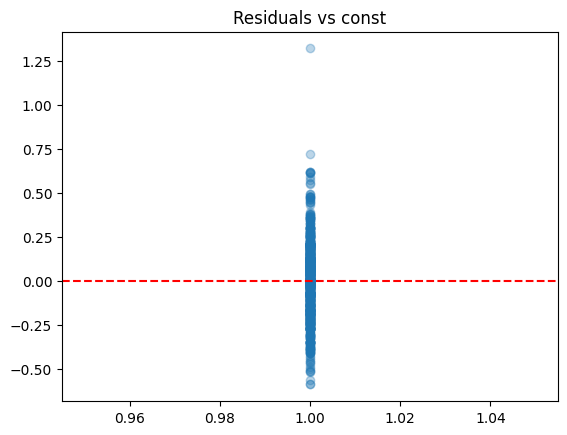

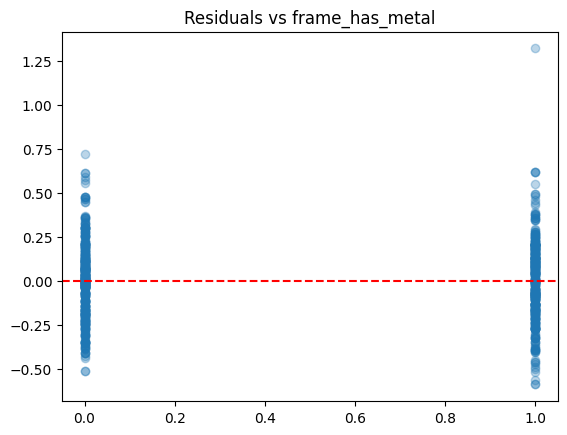

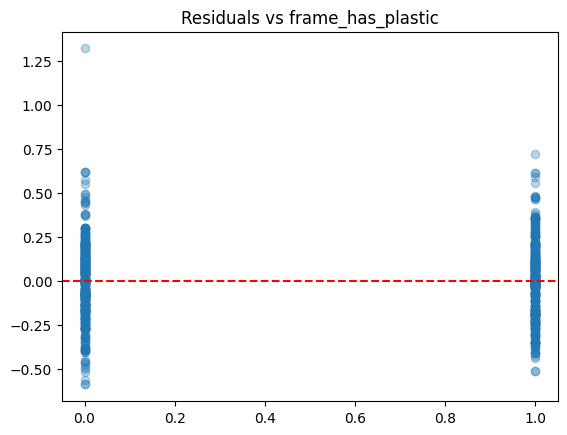

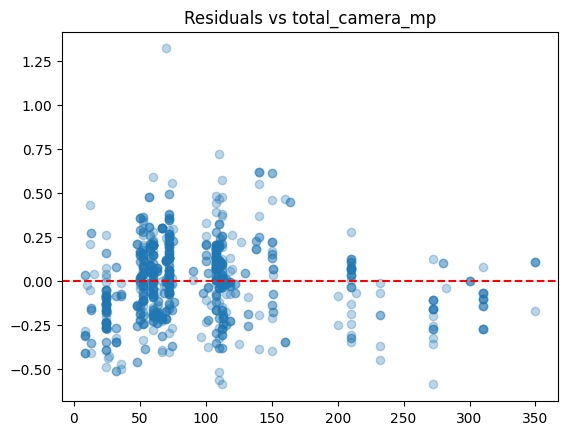

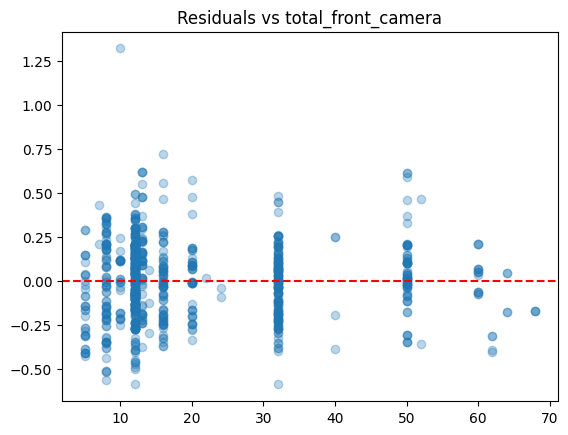

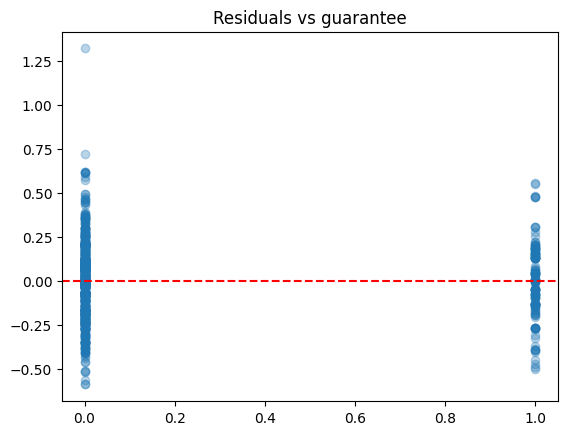

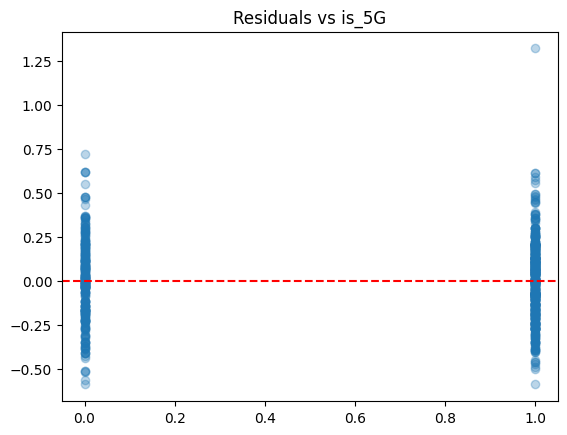

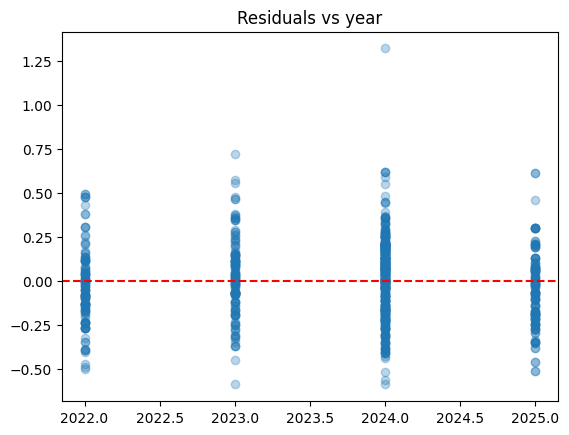

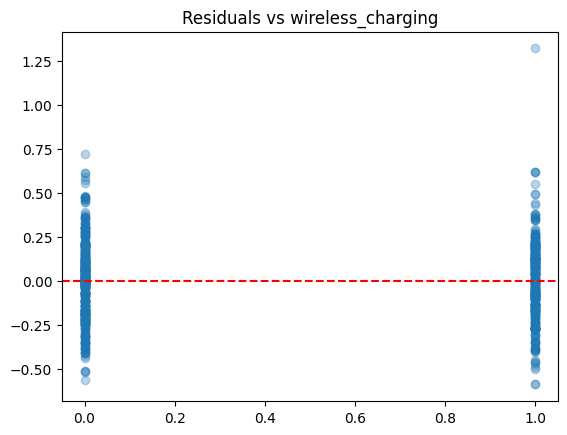

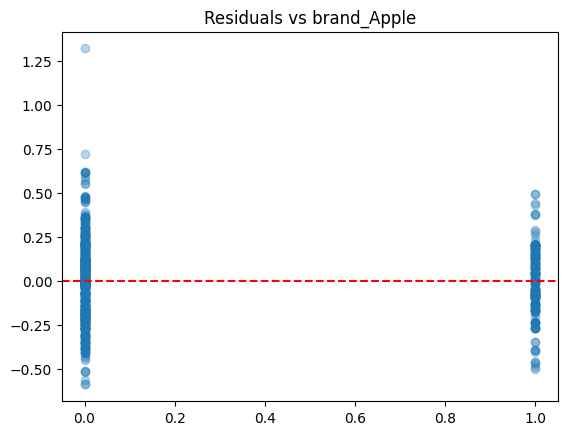

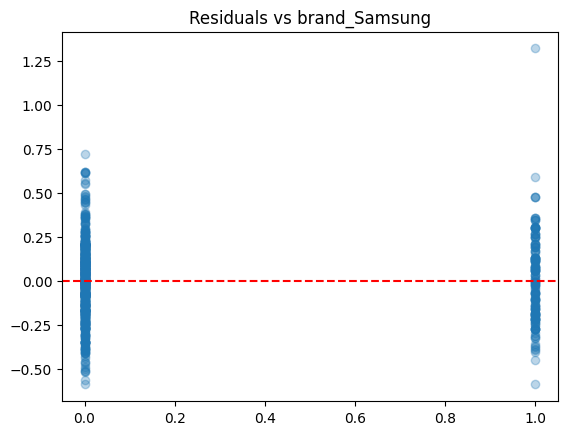

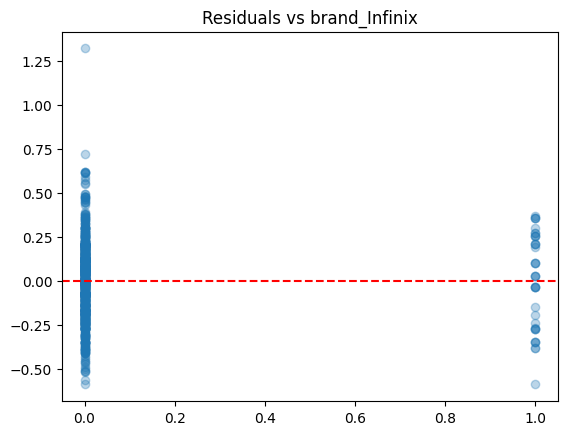

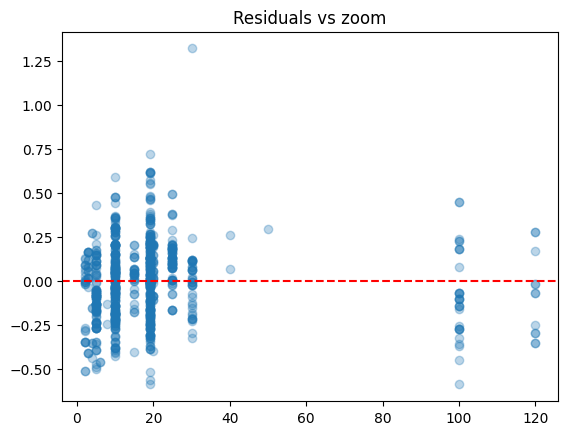

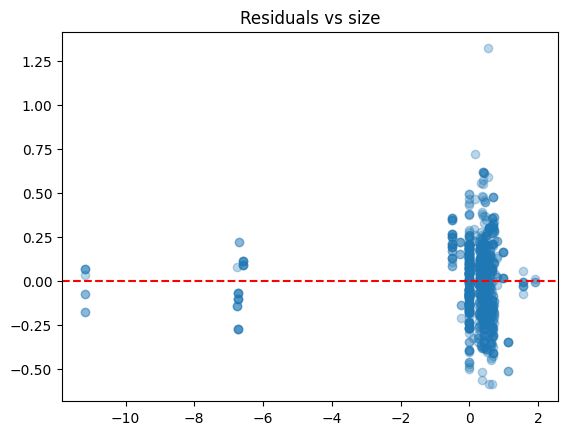

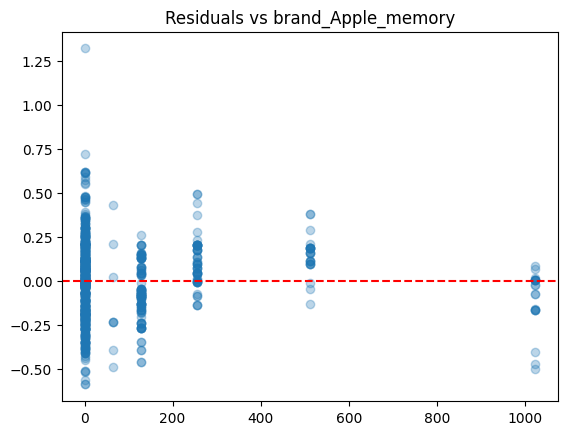

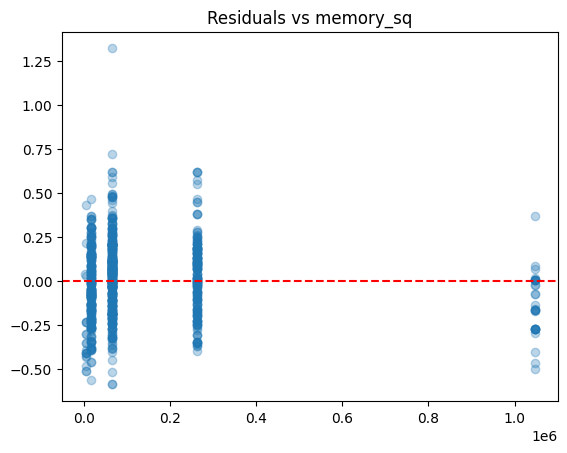

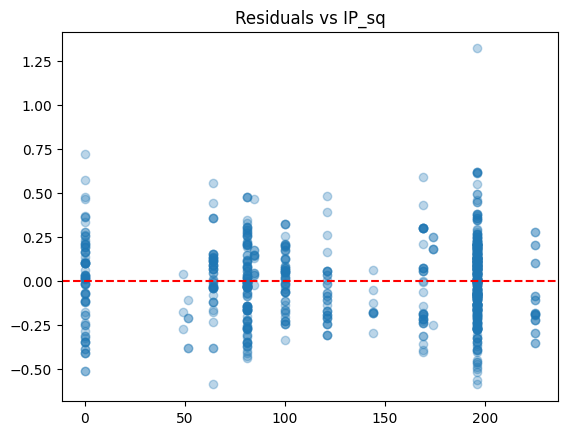

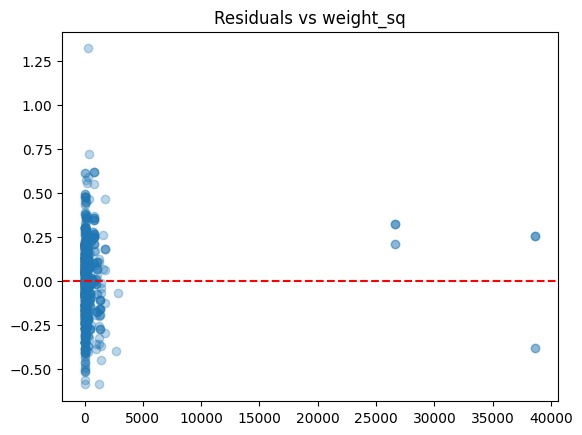

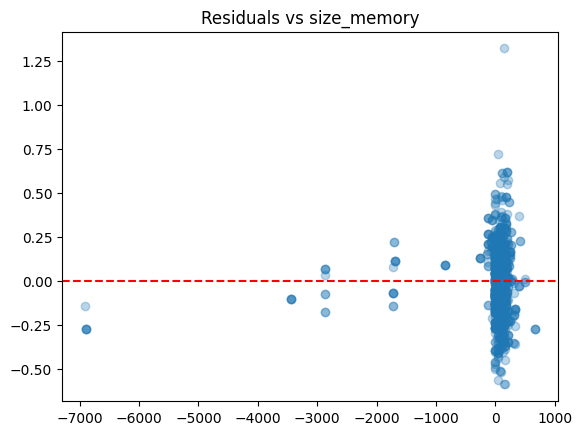

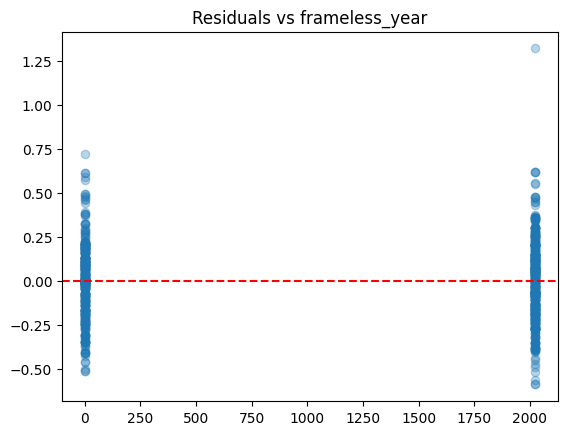

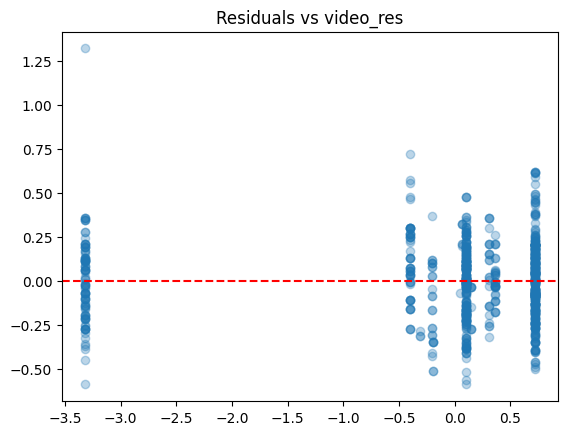

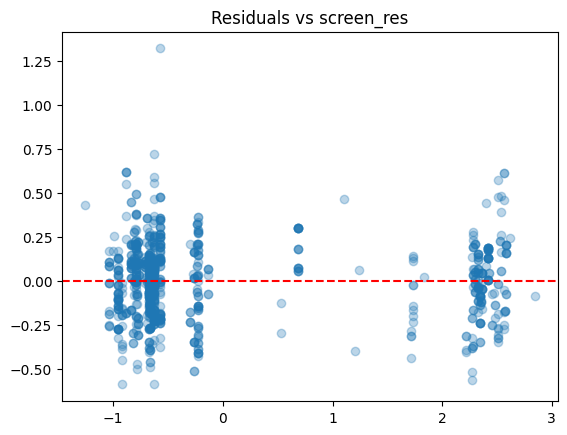

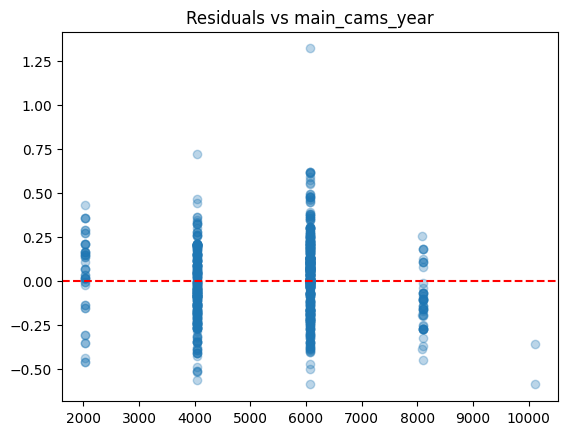

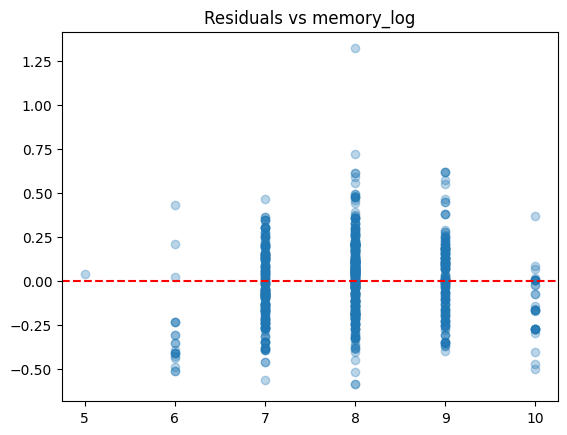

In [222]:
import matplotlib.pyplot as plt

for col in X_filled_clean3.columns:
    plt.scatter(X_filled_clean3[col], residuals, alpha=0.3)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f"Residuals vs {col}")
    plt.show()


In [228]:
import statsmodels.formula.api as smf
from tqdm import tqdm

data = X_filled_clean3.copy()
data['salePrice'] = y_clean  # Добавляем целевую переменную

# Список предикторов (включая преобразованные переменные)
predictors = [
    'frame_has_metal', 'frame_has_plastic', 'total_camera_mp',
    'total_front_camera', 'guarantee', 'is_5G', 'year',
    'wireless_charging', 'brand_Apple', 'brand_Samsung',
    'brand_Infinix', 'zoom', 'size', 'brand_Apple_memory',
    'memory_sq', 'IP_sq', 'weight_sq', 'size_memory',
    'frameless_year', 'video_res', 'screen_res',
    'main_cams_year', 'memory_log'
]

# Формула для модели
formula = f"salePrice ~ {' + '.join(predictors)}"

# Квантильная регрессия для нескольких квантилей с бутстрапированными ошибками
np.random.seed(1001)
quantiles_mq = [0.1, 0.5, 0.75, 0.9]
models_mq = []  # здесь будем хранить финальные модели с правильными SE
n_boot = 50  # Количество бутстрап-итераций
boot = 50  # Количество бутстрап-итераций

# Бутстрэп-процедура
print("Запуск бутстрэп-процедуры...")
bootstrap_coefs = {q: [] for q in quantiles_mq}
for _ in tqdm(range(n_boot), desc="Прогресс"):
    bootstrap_sample = data.sample(n=len(data), replace=True)
    for q in quantiles_mq:
        model = smf.quantreg(formula, data=bootstrap_sample).fit(q=q)
        bootstrap_coefs[q].append(model.params)

# Создаем модели с бутстрап-стандартными ошибками
for q in quantiles_mq:
    # Основная модель
    main_model = smf.quantreg(formula, data=data).fit(q=q)
    
    # Рассчитываем бутстрап-стандартные ошибки
    coefs = pd.DataFrame(bootstrap_coefs[q])
    bse = coefs.std()
    
    # Обновляем стандартные ошибки в модели
    main_model.bse = bse
    models_mq.append(main_model)
    
    # Вывод результатов
    print(f"\n{'='*80}")
    print(f"=== Результаты квантильной регрессии для квантиля {q} (бутстрэп, n={n_boot}) ===")
    print(f"{'='*80}\n")
    print(main_model.summary())
    
# Функция для создания таблицы результатов
def create_results_table(q):
    main_model = smf.quantreg(formula, data=data).fit(q=q)
    coefs_df = pd.DataFrame(bootstrap_coefs[q])
    bse = coefs_df.std()
    
    results = pd.DataFrame({
        'factor': ['Intercept'] + predictors,
        'coeff': [main_model.params[p] for p in ['Intercept'] + predictors],
        'std err (boot)': [bse[p] for p in ['Intercept'] + predictors],
        '95% CI low': [main_model.params[p] - 1.96*bse[p] for p in ['Intercept'] + predictors],
        '95% CI high': [main_model.params[p] + 1.96*bse[p] for p in ['Intercept'] + predictors],
        't-stat': [main_model.params[p]/bse[p] for p in ['Intercept'] + predictors],
        'p-value': [2*(1-stats.norm.cdf(abs(main_model.params[p]/bse[p]))) for p in ['Intercept'] + predictors]
    })
    
    # Форматирование чисел
    for col in results.columns[1:]:
        results[col] = results[col].apply(lambda x: f"{x:.4f}" if isinstance(x, (int, float)) else x)
    
    return results

# Вывод красивых таблиц для каждого квантиля
for q in quantiles_mq:
    print(f"\n{'='*80}")
    print(f"=== Результаты для квантиля {q} ===")
    print(f"{'='*80}\n")
    display(create_results_table(q))

Запуск бутстрэп-процедуры...


Прогресс: 100%|██████████| 50/50 [01:32<00:00,  1.85s/it]



=== Результаты квантильной регрессии для квантиля 0.1 (бутстрэп, n=50) ===

                         QuantReg Regression Results                          
Dep. Variable:              salePrice   Pseudo R-squared:               0.4758
Model:                       QuantReg   Bandwidth:                      0.2033
Method:                 Least Squares   Sparsity:                        2.004
Date:                Wed, 07 May 2025   No. Observations:                  919
Time:                        22:57:40   Df Residuals:                      895
                                        Df Model:                           23
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           5.565e-07   6.32e-05      0.009      0.993      -0.000       0.000
frame_has_metal        0.0008      0.075      0.010      0.992      -0.146       0.148
frame_has_plastic     

,factor,coeff,std err (boot),95% CI low,95% CI high,t-stat,p-value
0,Intercept,0.0000,0.0001,-0.0003,0.0003,0.0041,0.9967
1,frame_has_metal,0.0008,0.0741,-0.1445,0.1461,0.0104,0.9917
2,frame_has_plastic,-0.0014,0.0881,-0.1741,0.1713,-0.0161,0.9872
3,total_camera_mp,0.0031,0.0007,0.0018,0.0044,4.5642,0.0000
4,total_front_camera,0.0104,0.0033,0.0040,0.0168,3.1764,0.0015
5,guarantee,0.0026,0.1303,-0.2529,0.2581,0.0199,0.9841
6,is_5G,0.0005,0.1227,-0.2401,0.2410,0.0037,0.9971
7,year,0.0039,0.0003,0.0033,0.0045,13.6205,0.0000
8,wireless_charging,0.0003,0.1365,-0.2673,0.2679,0.0024,0.9981
9,brand_Apple,-0.0001,0.1857,-0.3640,0.3638,-0.0007,0.9995



=== Результаты для квантиля 0.5 ===



,factor,coeff,std err (boot),95% CI low,95% CI high,t-stat,p-value
0,Intercept,0.0000,0.0001,-0.0001,0.0001,0.1845,0.8537
1,frame_has_metal,0.0394,0.1009,-0.1583,0.2371,0.3903,0.6963
2,frame_has_plastic,-0.0271,0.1185,-0.2593,0.2050,-0.2290,0.8189
3,total_camera_mp,0.0024,0.0004,0.0015,0.0032,5.3873,0.0000
4,total_front_camera,0.0055,0.0024,0.0008,0.0102,2.3052,0.0212
5,guarantee,0.0055,0.0846,-0.1603,0.1713,0.0648,0.9484
6,is_5G,-0.0080,0.1787,-0.3583,0.3422,-0.0450,0.9641
7,year,0.0044,0.0003,0.0038,0.0050,15.0834,0.0000
8,wireless_charging,0.0248,0.1170,-0.2044,0.2541,0.2124,0.8318
9,brand_Apple,0.0091,0.0545,-0.0977,0.1158,0.1665,0.8678



=== Результаты для квантиля 0.75 ===



,factor,coeff,std err (boot),95% CI low,95% CI high,t-stat,p-value
0,Intercept,-0.0000,0.0000,-0.0001,0.0001,-0.0583,0.9535
1,frame_has_metal,0.0005,0.0934,-0.1826,0.1836,0.0055,0.9956
2,frame_has_plastic,0.0003,0.0755,-0.1477,0.1483,0.0038,0.9969
3,total_camera_mp,0.0017,0.0005,0.0008,0.0027,3.5873,0.0003
4,total_front_camera,0.0048,0.0022,0.0005,0.0090,2.2080,0.0272
5,guarantee,0.0060,0.0611,-0.1138,0.1257,0.0976,0.9223
6,is_5G,-0.0014,0.1157,-0.2282,0.2254,-0.0121,0.9903
7,year,0.0044,0.0002,0.0040,0.0048,20.4971,0.0000
8,wireless_charging,-0.0010,0.1015,-0.1999,0.1979,-0.0095,0.9924
9,brand_Apple,-0.0000,0.0925,-0.1814,0.1813,-0.0005,0.9996



=== Результаты для квантиля 0.9 ===



,factor,coeff,std err (boot),95% CI low,95% CI high,t-stat,p-value
0,Intercept,-0.0000,0.0001,-0.0002,0.0001,-0.2138,0.8307
1,frame_has_metal,-0.0003,0.0783,-0.1538,0.1532,-0.0042,0.9966
2,frame_has_plastic,0.0002,0.0993,-0.1945,0.1948,0.0015,0.9988
3,total_camera_mp,0.0004,0.0008,-0.0012,0.0020,0.4938,0.6214
4,total_front_camera,0.0054,0.0034,-0.0012,0.0120,1.5972,0.1102
5,guarantee,-0.0015,0.0814,-0.1610,0.1580,-0.0181,0.9855
6,is_5G,-0.0019,0.1163,-0.2298,0.2260,-0.0162,0.9871
7,year,0.0046,0.0002,0.0042,0.0049,24.2143,0.0000
8,wireless_charging,-0.0002,0.1197,-0.2348,0.2345,-0.0013,0.9990
9,brand_Apple,-0.0054,0.1260,-0.2523,0.2416,-0.0425,0.9661


### **1. Общие закономерности**
- **Год выпуска (`year`)** имеет стабильное положительное влияние на всех квантилях (коэффициент ~0.004, p<0.001). Это означает, что новые модели дороже, причем эффект одинаков для бюджетных и премиальных устройств.
- **Качество камеры (`total_camera_mp`, `total_front_camera`)** значимо почти на всех квантилях, но влияние сильнее на нижних квантилях (q=0.1). 
  - Это говорит о том, что для бюджетных телефонов мегапиксели камеры важнее, чем для флагманов.

- **Бренд Apple (`brand_Apple`)** не показывает значимого влияния (p>0.9 на всех квантилях)

### **2. Различия между квантилями**
#### **a. Параметры, важные для бюджетных телефонов (q=0.1)**
- **Фронтальная камера (`total_front_camera`)**: +0.0104 (p<0.001) — сильнее влияет на низкие цены.
- **Память (`brand_Apple_memory`)**: +0.0023 (p<0.001) — объем памяти критичен для дешевых моделей.
- **Защита от воды (`IP_sq`)**: +0.0064 (p<0.001) — даже в бюджетном сегменте это значимый фактор.

#### **b. Параметры, важные для премиальных телефонов (q=0.9)**
- **Зум (`zoom`)**: +0.0051 (p<0.001) — важнее для дорогих устройств.
- **Разрешение экрана (`screen_res`)** теряет значимость на q=0.9 (p=0.73), хотя на q=0.5 оно было значимо (+0.0677).
- **Вес (`weight_sq`)**: -9.3e-06 (p=0.022) — для топовых моделей меньший вес ассоциирован с более высокой ценой (возможно, из-за использования премиальных материалов).


**Лучшим решением будет удалить `frame_has_metal`, `frame_has_plastic`, `wireless_charging`, `is_5G`, `guarantee`, `frameless_year`, `brand_Apple`, `brand_Samsung`, `brand_Infinix`, `memory_log` т.к. они являются незначимыми**

In [234]:
# Тест на равенство коэффициентов между квантилями (пример для year)
coef_01 = models_mq[0].params['year']  # q=0.1
coef_09 = models_mq[3].params['year']  # q=0.9

se_01 = pd.DataFrame(bootstrap_coefs[0.1]).std()['year']
se_09 = pd.DataFrame(bootstrap_coefs[0.9]).std()['year']

diff = coef_01 - coef_09
se_diff = np.sqrt(se_01**2 + se_09**2)
wald_stat = diff / se_diff
p_value = 2 * (1 - stats.norm.cdf(abs(wald_stat)))

print("\nТест равенства коэффициентов для year (q=0.1 vs q=0.9):")
print(f"Коэффициент для q=0.1: {coef_01:.4f} (std err: {se_01:.4f})")
print(f"Коэффициент для q=0.9: {coef_09:.4f} (std err: {se_09:.4f})")
print(f"Разность: {diff:.4f} (std err: {se_diff:.4f})")
print(f"Wald statistic: {wald_stat:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print(f"Заключение: Отвергаем H0 (p={p_value:.4f} < {alpha}). Коэффициенты различаются.")
else:
    print(f"Заключение: Не отвергаем H0 (p={p_value:.4f} >= {alpha}). Нет доказательств различий.")


Тест равенства коэффициентов для year (q=0.1 vs q=0.9):
Коэффициент для q=0.1: 0.0039 (std err: 0.0003)
Коэффициент для q=0.9: 0.0046 (std err: 0.0002)
Разность: -0.0007 (std err: 0.0003)
Wald statistic: -1.9651
P-value: 0.0494
Заключение: Отвергаем H0 (p=0.0494 < 0.05). Коэффициенты различаются.


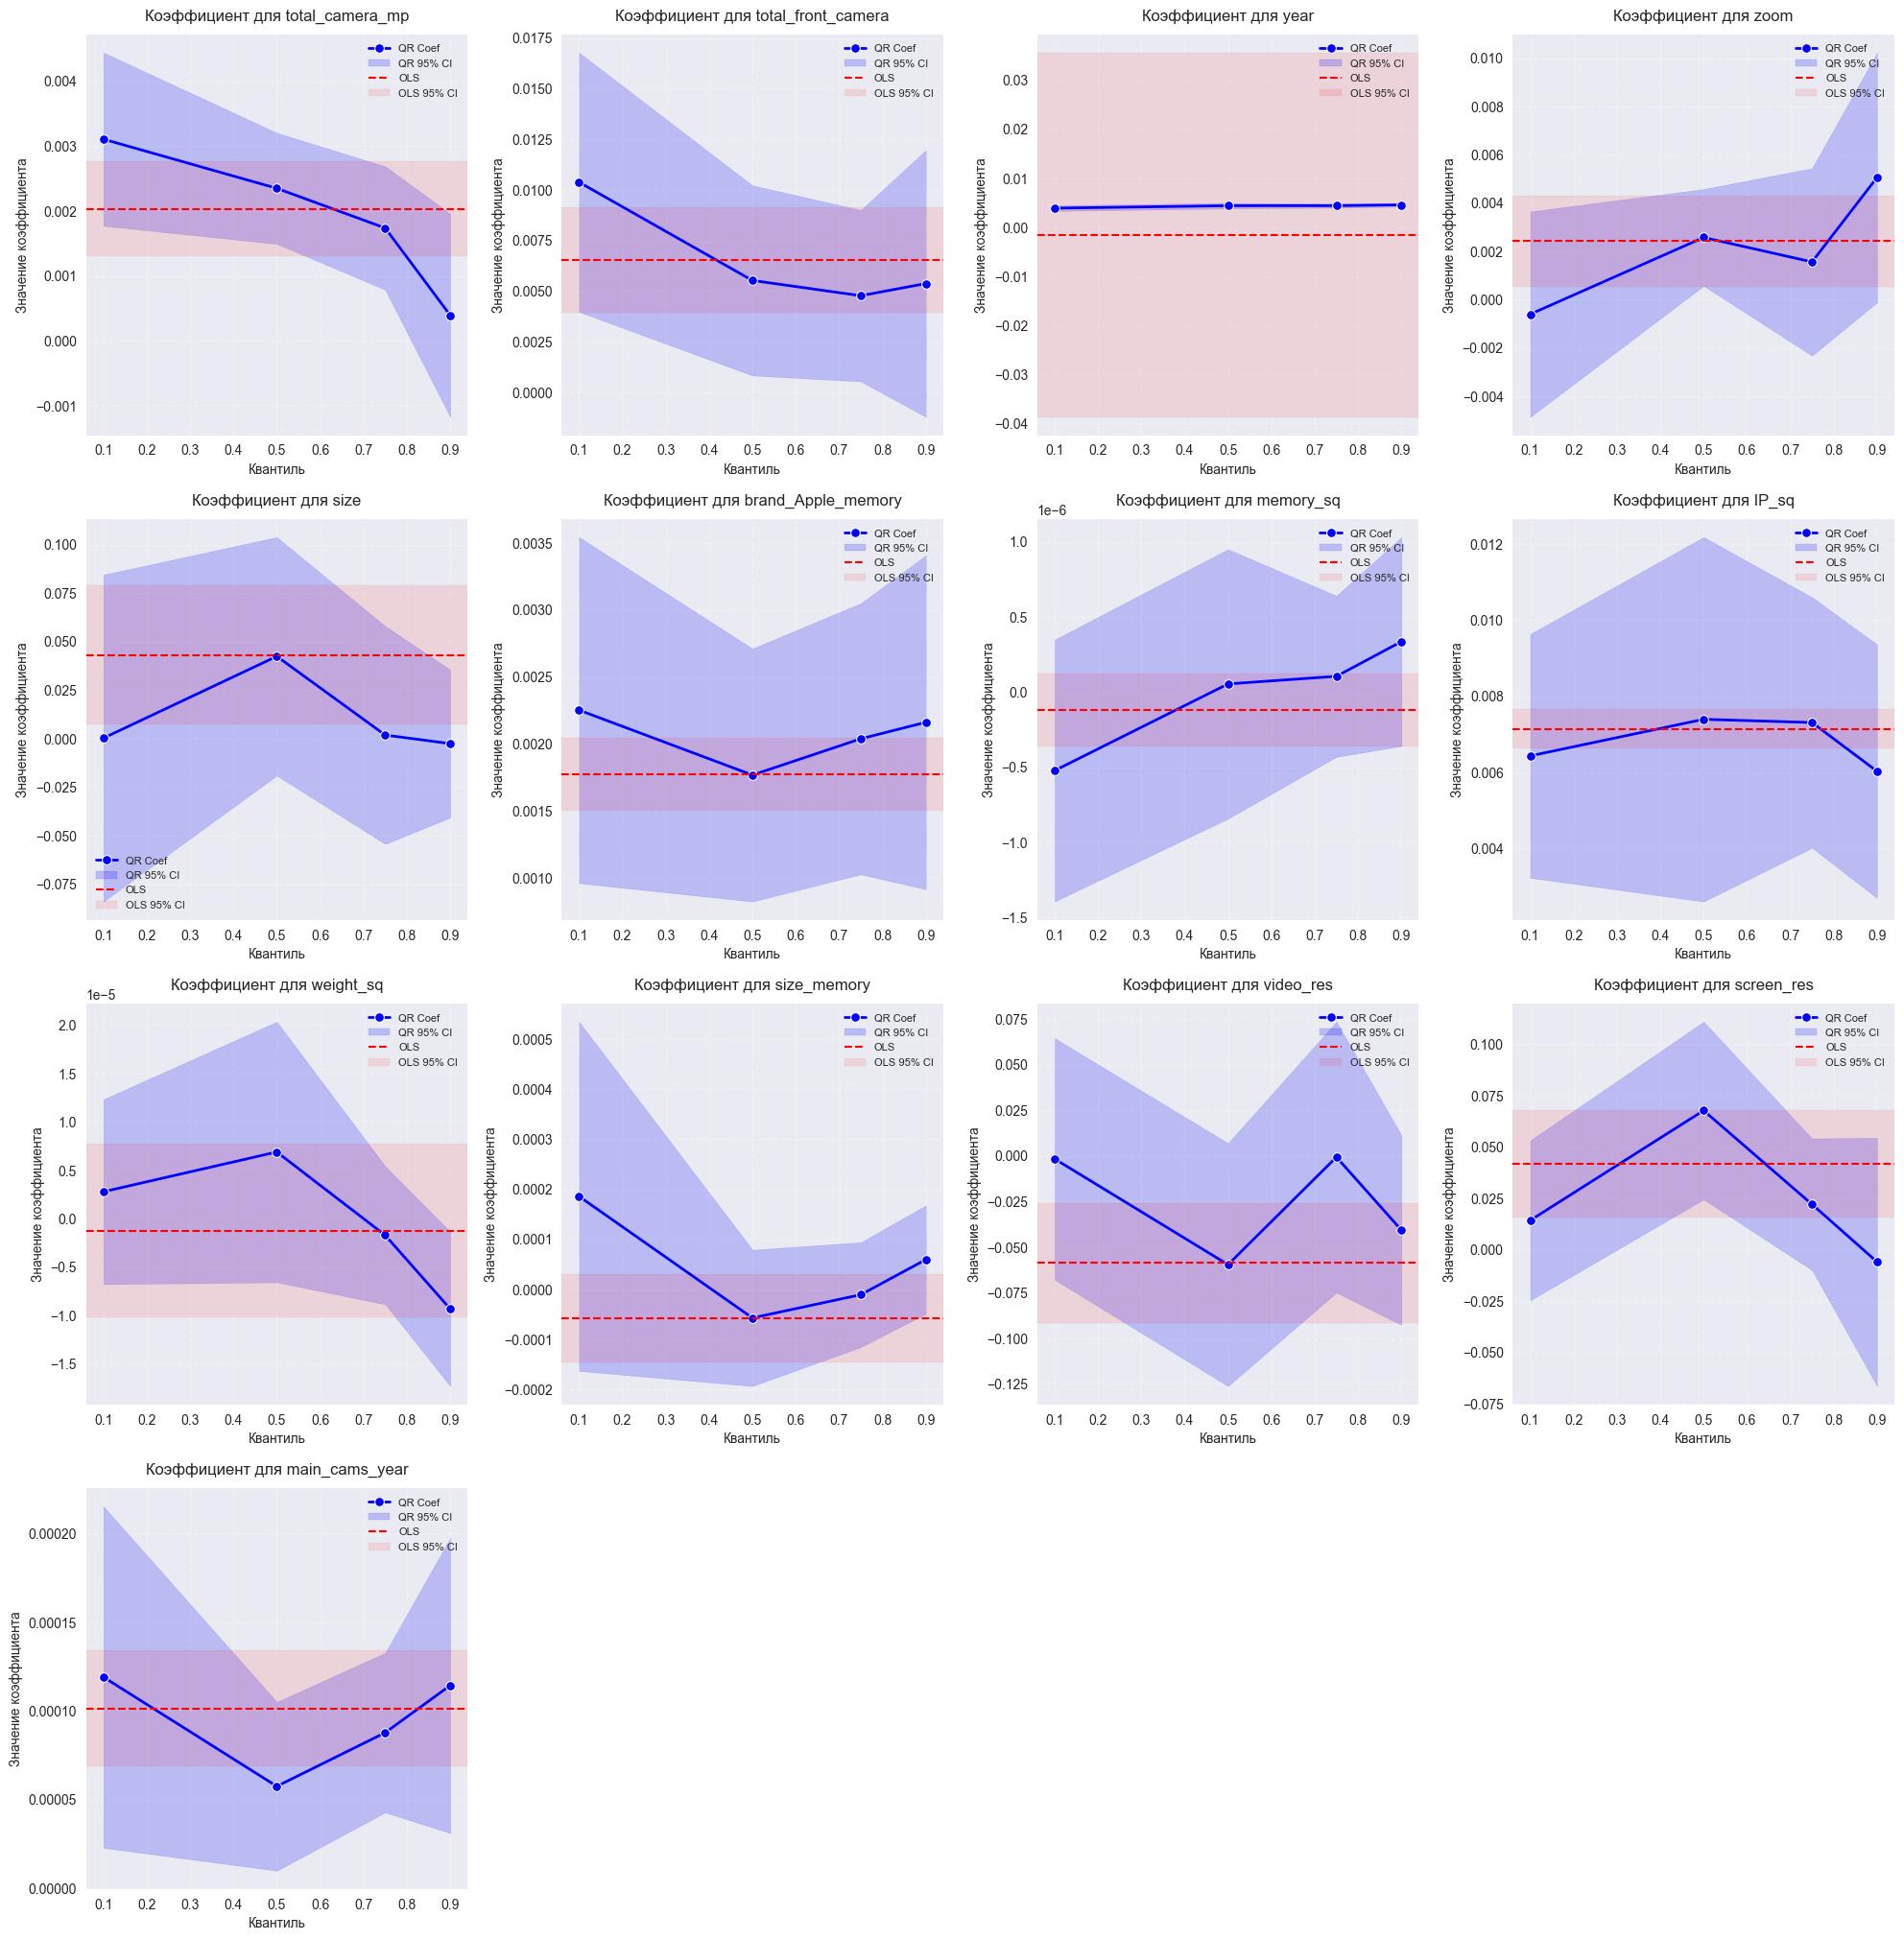

In [233]:
# Создаем DataFrame для хранения результатов
plot_data = pd.DataFrame()

# Переменные для анализа (указанные вами)
predictors = [
    'total_camera_mp', 'total_front_camera', 'year',
    'zoom', 'size', 'brand_Apple_memory',
    'memory_sq', 'IP_sq', 'weight_sq', 'size_memory',
    'video_res', 'screen_res', 'main_cams_year'
]

# Собираем данные по всем квантилям
for q in quantiles_mq:
    model = models_mq[quantiles_mq.index(q)]
    
    # Создаем временный DataFrame для текущего квантиля
    temp_df = pd.DataFrame({'quantile': q}, index=[0])
    
    # Добавляем коэффициенты и доверительные интервалы для каждой переменной
    for pred in predictors:
        if pred in model.params:  # Проверяем наличие переменной в модели
            temp_df[pred] = model.params[pred]
            temp_df[f'{pred}_lower'] = model.params[pred] - 1.96 * model.bse[pred]
            temp_df[f'{pred}_upper'] = model.params[pred] + 1.96 * model.bse[pred]
    
    plot_data = pd.concat([plot_data, temp_df], ignore_index=True)

# Оцениваем OLS модель для сравнения
ols_model = smf.ols('salePrice ~ ' + ' + '.join(predictors), data=data).fit()
ols_conf_int = ols_model.conf_int()

# Создаем сетку графиков
n_rows = 5  # Можете настроить по своему усмотрению
n_cols = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 25))
axes = axes.flatten()

# Визуализация для каждой переменной
for i, pred in enumerate(predictors):
    if i < len(axes):  # Защита от выхода за пределы сетки
        ax = axes[i]
        
        # Квантильная регрессия
        sns.lineplot(data=plot_data, x='quantile', y=pred, ax=ax,
                    color='blue', marker='o', label='QR Coef', linewidth=2)
        ax.fill_between(plot_data['quantile'],
                       plot_data[f'{pred}_lower'],
                       plot_data[f'{pred}_upper'],
                       color='blue', alpha=0.2, label='QR 95% CI')
        
        # OLS для сравнения (если переменная есть в OLS модели)
        if pred in ols_model.params:
            ols_coef = ols_model.params[pred]
            ols_lower = ols_conf_int.loc[pred, 0]
            ols_upper = ols_conf_int.loc[pred, 1]
            
            ax.axhline(ols_coef, color='red', linestyle='--',
                      linewidth=1.5, label='OLS')
            ax.axhspan(ols_lower, ols_upper,
                      color='red', alpha=0.1, label='OLS 95% CI')
        
        # Настройки графика
        ax.set_title(f'Коэффициент для {pred}', fontsize=12, pad=10)
        ax.set_xlabel('Квантиль', fontsize=10)
        ax.set_ylabel('Значение коэффициента', fontsize=10)
        ax.legend(fontsize=8, framealpha=0.9)
        ax.grid(True, linestyle='--', alpha=0.3)

# Удаляем пустые оси
for j in range(len(predictors), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()